In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal, glorot_normal
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable


Using TensorFlow backend.


In [2]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
#loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#seperating cv data from train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d, %d)"%(X_cv.shape[1], X_cv.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 48000 and each image is of shape (28, 28)
Number of training examples : 12000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255
X_cv = X_cv/255

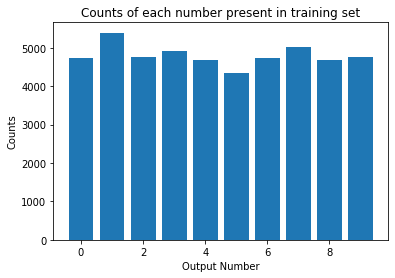

In [7]:
#finding counts or distribution of outputs to identify which error metric to use
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Output Number')
plt.ylabel('Counts')
plt.title('Counts of each number present in training set')
plt.show()

In [8]:
# convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
X_cv = X_cv.reshape(X_cv.shape[0], X_cv.shape[1]*X_cv.shape[2]) 

In [9]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d)"%(X_cv.shape[1]))

Number of training examples : 48000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)
Number of training examples : 12000 and each image is of shape (784)


In [10]:
#performing one hot encoding on output label
#consider an image loabel is 5, so convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
Y_cv = np_utils.to_categorical(y_cv, 10)
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
#defining model parameters

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 50

# MLP with 2 hidden layers

## MLP with 2 hidden layers, units: 512, 256

In [12]:
#defining model architecture
model_2_a_1 = Sequential()
model_2_a_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_1.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a_1.summary()

#building a simple model to compare loss with further models
model_2_a_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.2525 - acc: 0.9259 - val_loss: 0.1275 - val_acc: 0.9602
Epoch 2/50
48000/48000 [==============================] - 7s 149us/ste

48000/48000 [==============================] - 7s 138us/step - loss: 7.4182e-06 - acc: 1.0000 - val_loss: 0.1058 - val_acc: 0.9836
Epoch 50/50
48000/48000 [==============================] - 6s 134us/step - loss: 6.1178e-06 - acc: 1.0000 - val_loss: 0.1064 - val_acc: 0.9837


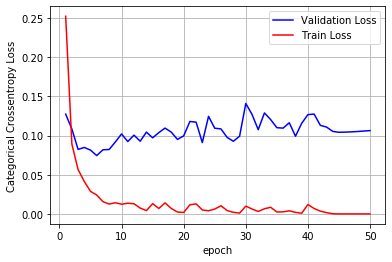

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

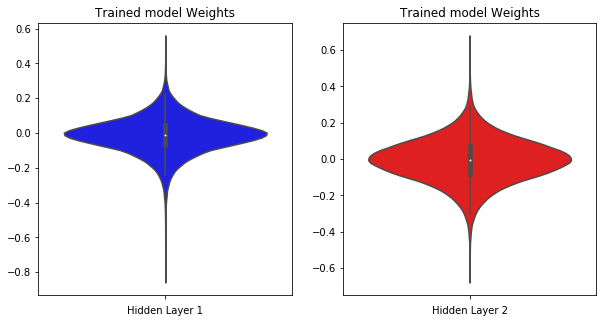

In [14]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [15]:
#finding loss and accuracy on test data
mlp_2_a_1_score = model_2_a_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_1_score[0]) 
print('Test accuracy:', mlp_2_a_1_score[1])

Test score: 0.10231393320279267
Test accuracy: 0.9844


## MLP with 2 hidden layers, units: 512, 256 with BatchNormalization

In [16]:
#defining model architecture
model_2_a_2 = Sequential()
model_2_a_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_2.add(BatchNormalization())

model_2_a_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_2.add(BatchNormalization())

model_2_a_2.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a_2.summary()

#building a simple model to compare loss with further models
model_2_a_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s

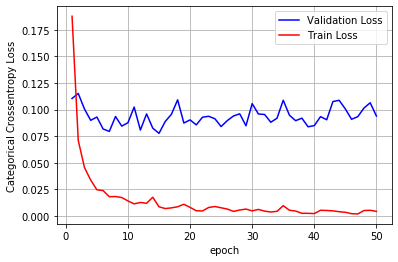

In [17]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

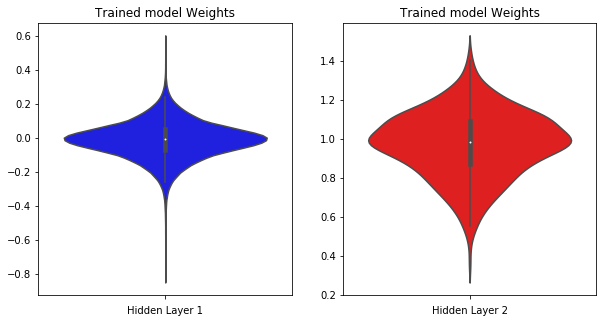

In [18]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [19]:
#finding loss and accuracy on test data
mlp_2_a_2_score = model_2_a_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_2_score[0]) 
print('Test accuracy:', mlp_2_a_2_score[1])

Test score: 0.09631527258029178
Test accuracy: 0.9811


## MLP with 2 hidden layers, units: 512, 256 with BatchNormalization with dropout(0.2)

In [20]:
#defining model architecture
model_2_a_3 = Sequential()
model_2_a_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_3.add(BatchNormalization())
model_2_a_3.add(Dropout(0.2))

model_2_a_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_3.add(BatchNormalization())
model_2_a_3.add(Dropout(0.2))

model_2_a_3.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a_3.summary()

#building a simple model to compare loss with further models
model_2_a_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_____

48000/48000 [==============================] - 8s 163us/step - loss: 0.0075 - acc: 0.9975 - val_loss: 0.0795 - val_acc: 0.9855
Epoch 47/50
48000/48000 [==============================] - 8s 163us/step - loss: 0.0077 - acc: 0.9972 - val_loss: 0.0795 - val_acc: 0.9846
Epoch 48/50
48000/48000 [==============================] - 8s 163us/step - loss: 0.0078 - acc: 0.9972 - val_loss: 0.0780 - val_acc: 0.9842
Epoch 49/50
48000/48000 [==============================] - 8s 164us/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0744 - val_acc: 0.9856
Epoch 50/50
48000/48000 [==============================] - 8s 166us/step - loss: 0.0094 - acc: 0.9971 - val_loss: 0.0764 - val_acc: 0.9838


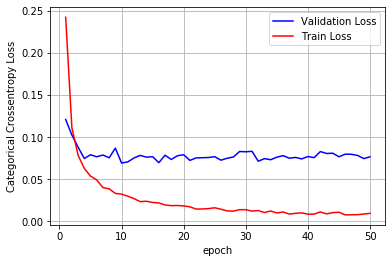

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

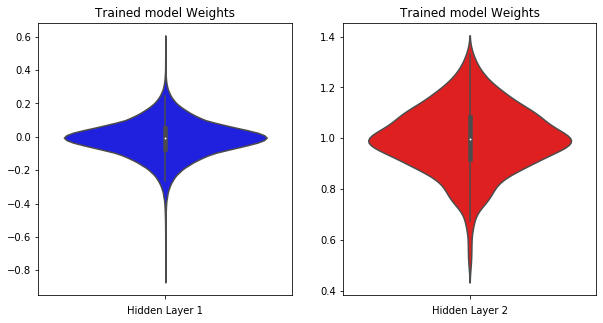

In [22]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [23]:
#finding loss and accuracy on test data
mlp_2_a_3_score = model_2_a_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_3_score[0]) 
print('Test accuracy:', mlp_2_a_3_score[1])

Test score: 0.076942099341098
Test accuracy: 0.9838


## MLP with 2 hidden layers, units: 512, 256 with BatchNormalization with dropout(0.3)

In [24]:
#defining model architecture
model_2_a_4 = Sequential()
model_2_a_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_4.add(BatchNormalization())
model_2_a_4.add(Dropout(0.3))

model_2_a_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_4.add(BatchNormalization())
model_2_a_4.add(Dropout(0.3))

model_2_a_4.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a_4.summary()

#building a simple model to compare loss with further models
model_2_a_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

48000/48000 [==============================] - 8s 157us/step - loss: 0.0123 - acc: 0.9959 - val_loss: 0.0682 - val_acc: 0.9845


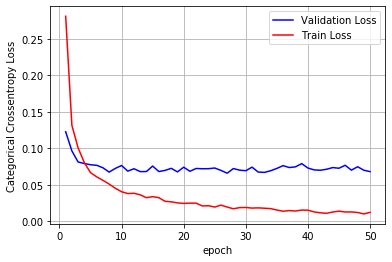

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

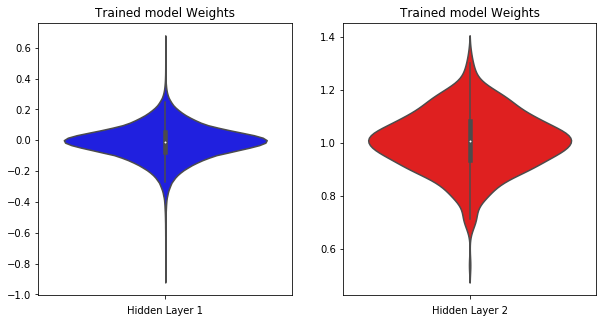

In [26]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [27]:
#finding loss and accuracy on test data
mlp_2_a_4_score = model_2_a_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_4_score[0]) 
print('Test accuracy:', mlp_2_a_4_score[1])

Test score: 0.06767744555561149
Test accuracy: 0.9852


## MLP with 2 hidden layers, units: 512, 256 with BatchNormalization with dropout(0.5)

In [28]:
#defining model architecture
model_2_a_5 = Sequential()
model_2_a_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_5.add(BatchNormalization())
model_2_a_5.add(Dropout(0.5))

model_2_a_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_5.add(BatchNormalization())
model_2_a_5.add(Dropout(0.5))

model_2_a_5.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a_5.summary()

#building a simple model to compare loss with further models
model_2_a_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

48000/48000 [==============================] - 8s 160us/step - loss: 0.0254 - acc: 0.9914 - val_loss: 0.0661 - val_acc: 0.9842


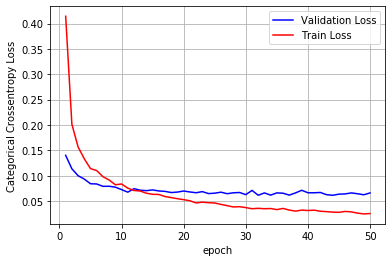

In [29]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

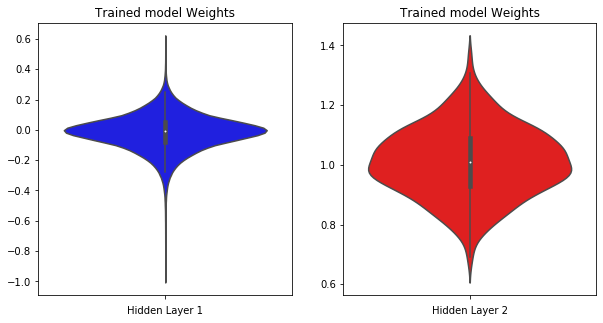

In [30]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [31]:
#finding loss and accuracy on test data
mlp_2_a_5_score = model_2_a_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_5_score[0]) 
print('Test accuracy:', mlp_2_a_5_score[1])

Test score: 0.06503988462072811
Test accuracy: 0.9845


## MLP with 2 hidden layers, units: 512, 128

In [32]:
#defining model architecture
model_2_b_1 = Sequential()
model_2_b_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b_1.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_b_1.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b_1.summary()


model_2_b_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 139us/step - loss: 0.2644 - acc: 0.9228 - val_loss: 0.1346 - val_acc: 0.9594
Epoch 2/50
48000/48000 [==============================] - 6s 120us/step - loss: 0.1002 - acc: 0.9696 - val_loss: 0.0871 - val_acc: 0.9728
Epoch 3/50
48000/48000 [============================

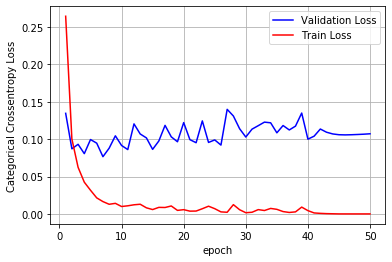

In [33]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

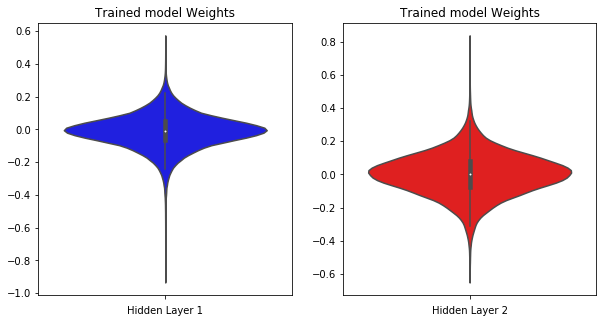

In [34]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [35]:
#finding loss and accuracy on test data
mlp_2_b_1_score = model_2_b_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_1_score[0]) 
print('Test accuracy:', mlp_2_b_1_score[1])

Test score: 0.10386166147648246
Test accuracy: 0.9833


## MLP with 2 hidden layers, units: 512, 128 with BatchNormalization

In [36]:
#defining model architecture
model_2_b_2 = Sequential()
model_2_b_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b_2.add(BatchNormalization())

model_2_b_2.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_b_2.add(BatchNormalization())

model_2_b_2.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b_2.summary()

model_2_b_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s

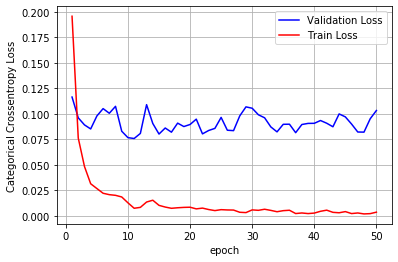

In [37]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

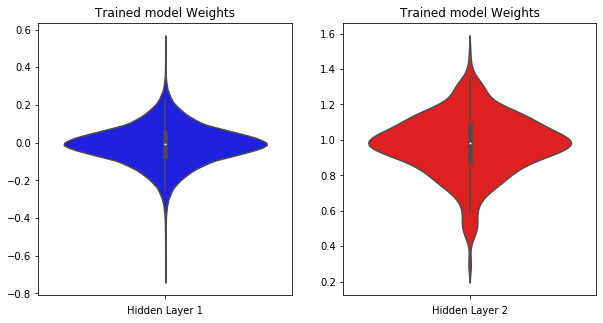

In [38]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [39]:
#finding loss and accuracy on test data
mlp_2_b_2_score = model_2_b_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_2_score[0]) 
print('Test accuracy:', mlp_2_b_2_score[1])

Test score: 0.09992004884263052
Test accuracy: 0.9798


## MLP with 2 hidden layers, units: 512, 128 with BatchNormalization with dropout(0.2)

In [40]:
#defining model architecture
model_2_b_3 = Sequential()
model_2_b_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b_3.add(BatchNormalization())
model_2_b_3.add(Dropout(0.2))

model_2_b_3.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_b_3.add(BatchNormalization())
model_2_b_3.add(Dropout(0.2))

model_2_b_3.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b_3.summary()


model_2_b_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

48000/48000 [==============================] - 7s 151us/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0755 - val_acc: 0.9838


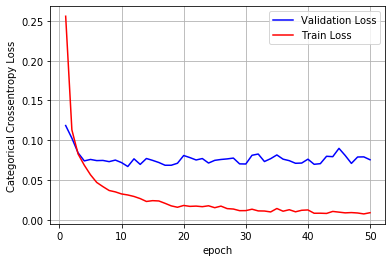

In [41]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

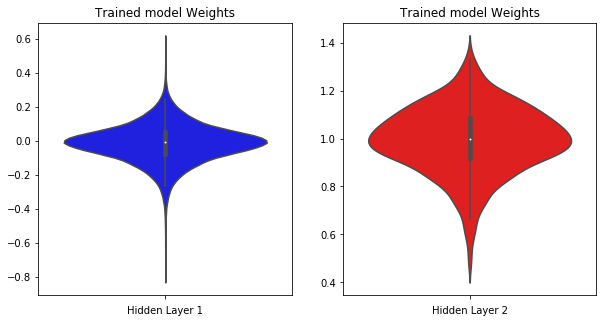

In [42]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [43]:
#finding loss and accuracy on test data
mlp_2_b_3_score = model_2_b_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_3_score[0]) 
print('Test accuracy:', mlp_2_b_3_score[1])

Test score: 0.07044662226861746
Test accuracy: 0.9832


## MLP with 2 hidden layers, units: 512, 128 with BatchNormalization with dropout(0.3)

In [44]:
#defining model architecture
model_2_b_4 = Sequential()
model_2_b_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b_4.add(BatchNormalization())
model_2_b_4.add(Dropout(0.3))

model_2_b_4.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_b_4.add(BatchNormalization())
model_2_b_4.add(Dropout(0.3))

model_2_b_4.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b_4.summary()

model_2_b_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

48000/48000 [==============================] - 7s 154us/step - loss: 0.0130 - acc: 0.9957 - val_loss: 0.0750 - val_acc: 0.9840


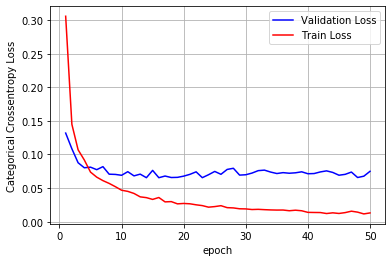

In [45]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

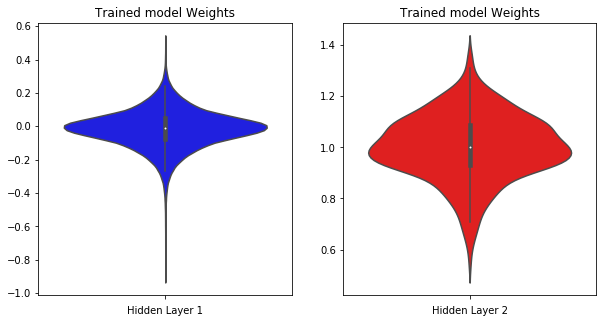

In [46]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [47]:
#finding loss and accuracy on test data
mlp_2_b_4_score = model_2_b_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_4_score[0]) 
print('Test accuracy:', mlp_2_b_4_score[1])

Test score: 0.07022024656599288
Test accuracy: 0.9834


## MLP with 2 hidden layers, units: 512, 256 with BatchNormalization with dropout(0.5)

In [48]:
#defining model architecture
model_2_b_5 = Sequential()
model_2_b_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b_5.add(BatchNormalization())
model_2_b_5.add(Dropout(0.5))

model_2_b_5.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 128 units
model_2_b_5.add(BatchNormalization())
model_2_b_5.add(Dropout(0.5))

model_2_b_5.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b_5.summary()

model_2_b_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

48000/48000 [==============================] - 7s 154us/step - loss: 0.0284 - acc: 0.9907 - val_loss: 0.0691 - val_acc: 0.9838


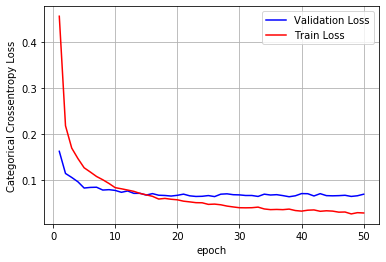

In [49]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

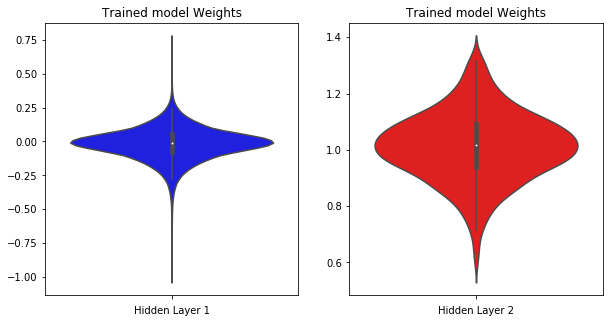

In [50]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [51]:
#finding loss and accuracy on test data
mlp_2_b_5_score = model_2_b_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_5_score[0]) 
print('Test accuracy:', mlp_2_b_5_score[1])

Test score: 0.06154039402774506
Test accuracy: 0.9843


## MLP with 2 hidden layers, units: 512, 128, with hue initializer

In [52]:
#defining model architecture
model_2_c_1 = Sequential()
model_2_c_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 512 units
model_2_c_1.add(BatchNormalization())
model_2_c_1.add(Dropout(0.5))

model_2_c_1.add(Dense(128, activation="relu", kernel_initializer="he_normal")) #second hidden layer with 128 units
model_2_c_1.add(BatchNormalization())
model_2_c_1.add(Dropout(0.5))

model_2_c_1.add(Dense(output_dim, activation="softmax")) #output layer

model_2_c_1.summary()

model_2_c_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_c_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

48000/48000 [==============================] - 7s 152us/step - loss: 0.0298 - acc: 0.9899 - val_loss: 0.0650 - val_acc: 0.9842


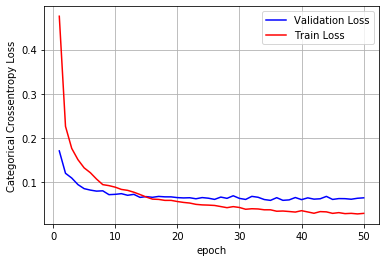

In [53]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

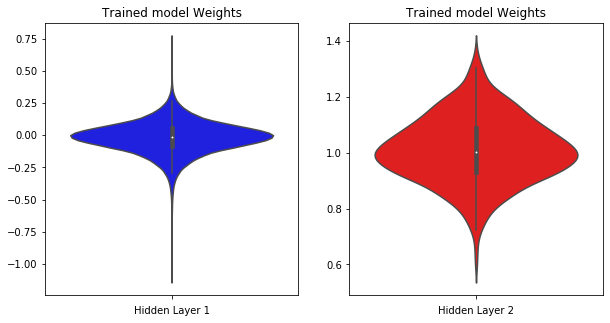

In [54]:
#monitoring weights to check if they are not overshooting
w_after = model_2_c_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')
plt.show()

In [55]:
#finding loss and accuracy on test data
mlp_2_c_1_score = model_2_c_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_c_1_score[0]) 
print('Test accuracy:', mlp_2_c_1_score[1])

Test score: 0.06130353781024969
Test accuracy: 0.9847


In [56]:

table = PrettyTable();
table.field_names = ['# Units','BN', 'Dropout Rate', 'Initializer', 'loss', 'Accuracy'];
table.add_row(['(512, 256)', 'No', 'None', 'glorot_normal', mlp_2_a_1_score[0], mlp_2_a_1_score[1]])
table.add_row(['(512, 256)', 'Yes', 'None', 'glorot_normal', mlp_2_a_2_score[0],mlp_2_a_2_score[1]])
table.add_row(['(512, 256)', 'Yes', '0.2', 'glorot_normal', mlp_2_a_3_score[0], mlp_2_a_3_score[1]])
table.add_row(['(512, 256)', 'Yes', '0.3', 'glorot_normal', mlp_2_a_4_score[0], mlp_2_a_4_score[1]])
table.add_row(['(512, 256)', 'Yes', '0.5', 'glorot_normal', mlp_2_a_5_score[0], mlp_2_a_5_score[1]])

table.add_row(['(512, 128)', 'No', 'None', 'glorot_normal', mlp_2_b_1_score[0], mlp_2_b_1_score[1]])
table.add_row(['(512, 128)', 'Yes', 'None', 'glorot_normal', mlp_2_b_2_score[0],mlp_2_b_2_score[1]])
table.add_row(['(512, 128)', 'Yes', '0.2', 'glorot_normal', mlp_2_b_3_score[0],mlp_2_b_3_score[1]])
table.add_row(['(512, 128)', 'Yes', '0.3', 'glorot_normal', mlp_2_b_4_score[0],mlp_2_b_4_score[1]])
table.add_row(['(512, 128)', 'Yes', '0.5', 'glorot_normal', mlp_2_b_5_score[0],mlp_2_b_5_score[1]])

table.add_row(['(512, 128)', 'Yes', '0.5', 'he_normal', mlp_2_c_1_score[0], mlp_2_c_1_score[1]])
print(table)

+------------+-----+--------------+---------------+---------------------+----------+
|  # Units   |  BN | Dropout Rate |  Initializer  |         loss        | Accuracy |
+------------+-----+--------------+---------------+---------------------+----------+
| (512, 256) |  No |     None     | glorot_normal | 0.10231393320279267 |  0.9844  |
| (512, 256) | Yes |     None     | glorot_normal | 0.09631527258029178 |  0.9811  |
| (512, 256) | Yes |     0.2      | glorot_normal |  0.076942099341098  |  0.9838  |
| (512, 256) | Yes |     0.3      | glorot_normal | 0.06767744555561149 |  0.9852  |
| (512, 256) | Yes |     0.5      | glorot_normal | 0.06503988462072811 |  0.9845  |
| (512, 128) |  No |     None     | glorot_normal | 0.10386166147648246 |  0.9833  |
| (512, 128) | Yes |     None     | glorot_normal | 0.09992004884263052 |  0.9798  |
| (512, 128) | Yes |     0.2      | glorot_normal | 0.07044662226861746 |  0.9832  |
| (512, 128) | Yes |     0.3      | glorot_normal | 0.07022024656

# MLP with 3 hidden layers

## MLP with 3 hidden layers 512, 256, 128

In [57]:
#defining model architecture
model_3_a_1 = Sequential()
model_3_a_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) 
model_3_a_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_3_a_1.add(Dense(128, activation="relu", kernel_initializer="glorot_normal"))
model_3_a_1.add(Dense(output_dim, activation="softmax")) #output layer

model_3_a_1.summary()

model_3_a_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 178us/step - loss: 0.2561 - acc: 0.9229 - val_loss: 0.1339 - val_acc: 0.9588
Epoch 2/50
48000/48000 [==============================] -

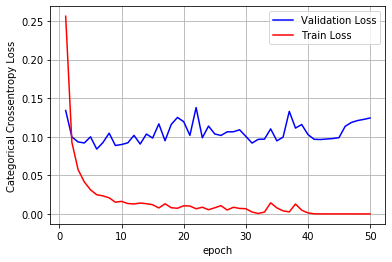

In [58]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

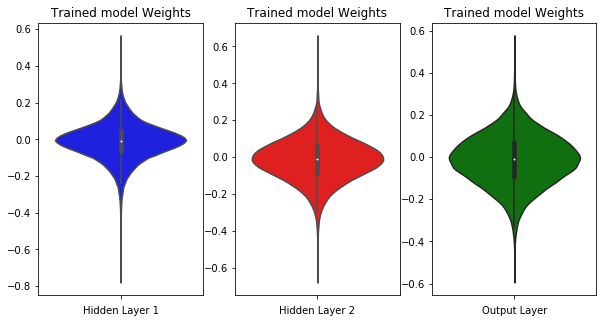

In [59]:
#monitoring weights to check if they are not overshooting
w_after = model_3_a_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [60]:
#finding loss and accuracy on test data
mlp_3_a_1_score = model_3_a_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_1_score[0]) 
print('Test accuracy:', mlp_3_a_1_score[1])

Test score: 0.12432624776655347
Test accuracy: 0.9845


## MLP with 3 hidden layers, units: 512, 256, 128 with BatchNormalization

In [61]:
#defining model architecture
model_3_a_2 = Sequential()
model_3_a_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_a_2.add(BatchNormalization())

model_3_a_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_3_a_2.add(BatchNormalization())

model_3_a_2.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_3_a_2.add(BatchNormalization())

model_3_a_2.add(Dense(output_dim, activation="softmax")) #output layer

model_3_a_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [62]:
model_3_a_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 11s 230us/step - loss: 0.1937 - acc: 0.9417 - val_loss: 0.1087 - val_acc: 0.9642
Epoch 2/50
48000/48000 [==============================] - 9s 184us/step - loss: 0.0792 - acc: 0.9760 - val_loss: 0.1311 - val_acc: 0.9624
Epoch 3/50
48000/48000 [==============================] - 9s 183us/step - loss: 0.0531 - acc: 0.9830 - val_loss: 0.0916 - val_acc: 0.9718
Epoch 4/50
48000/48000 [==============================] - 9s 183us/step - loss: 0.0401 - acc: 0.9867 - val_loss: 0.1025 - val_acc: 0.9713
Epoch 5/50
48000/48000 [==============================] - 9s 181us/step - loss: 0.0291 - acc: 0.9902 - val_loss: 0.0905 - val_acc: 0.9739
Epoch 6/50
48000/48000 [==============================] - 9s 181us/step - loss: 0.0275 - acc: 0.9911 - val_loss: 0.1016 - val_acc: 0.9735
Epoch 7/50
48000/48000 [==============================] - 9s 183us/step - loss: 0.0281 - acc: 0.9906 - val_loss: 0.0902 -

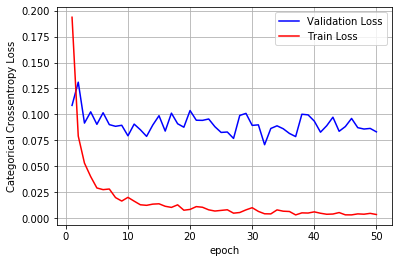

In [63]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

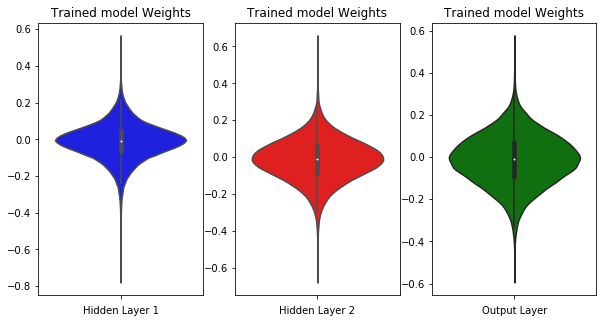

In [64]:
#monitoring weights to check if they are not overshooting
layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [65]:
#finding loss and accuracy on test data
mlp_3_a_2_score = model_3_a_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_2_score[0]) 
print('Test accuracy:', mlp_3_a_2_score[1])

Test score: 0.07941823251712994
Test accuracy: 0.9827


## MLP with 2 hidden layers, units: 512, 256, 128 with BatchNormalization with dropout(0.2)

In [66]:
#defining model architecture
model_3_a_3 = Sequential()
model_3_a_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_a_3.add(BatchNormalization())
model_3_a_3.add(Dropout(0.2))

model_3_a_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_3.add(BatchNormalization())
model_3_a_3.add(Dropout(0.2))

model_3_a_3.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_3.add(BatchNormalization())
model_3_a_3.add(Dropout(0.2))

model_3_a_3.add(Dense(output_dim, activation="softmax")) #output layer


model_3_a_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)             

In [67]:
model_3_a_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 296us/step - loss: 0.2894 - acc: 0.9113 - val_loss: 0.1260 - val_acc: 0.9584
Epoch 2/50
48000/48000 [==============================] - 11s 236us/step - loss: 0.1260 - acc: 0.9613 - val_loss: 0.1016 - val_acc: 0.9683
Epoch 3/50
48000/48000 [==============================] - 11s 223us/step - loss: 0.0975 - acc: 0.9697 - val_loss: 0.0867 - val_acc: 0.9722
Epoch 4/50
48000/48000 [==============================] - 11s 224us/step - loss: 0.0773 - acc: 0.9747 - val_loss: 0.0806 - val_acc: 0.9748
Epoch 5/50
48000/48000 [==============================] - 11s 235us/step - loss: 0.0647 - acc: 0.9786 - val_loss: 0.0851 - val_acc: 0.9747
Epoch 6/50
48000/48000 [==============================] - 11s 229us/step - loss: 0.0603 - acc: 0.9800 - val_loss: 0.0825 - val_acc: 0.9748
Epoch 7/50
48000/48000 [==============================] - 11s 237us/step - loss: 0.0524 - acc: 0.9823 - val_loss: 0.

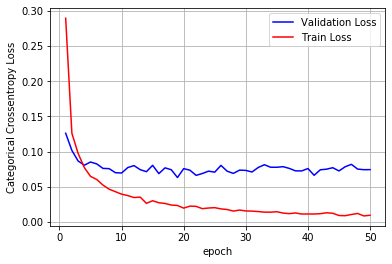

In [68]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

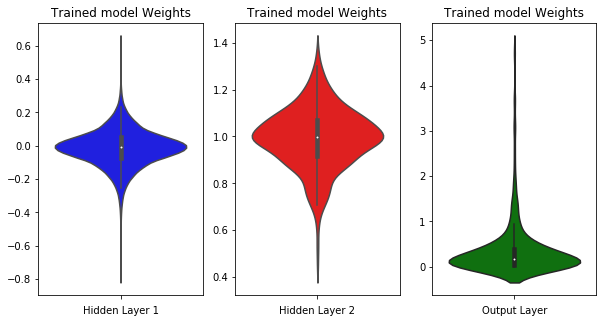

In [69]:
#monitoring weights to check if they are not overshooting
w_after = model_3_a_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [70]:
#finding loss and accuracy on test data
mlp_3_a_3_score = model_3_a_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_3_score[0]) 
print('Test accuracy:', mlp_3_a_3_score[1])

Test score: 0.07654495402032795
Test accuracy: 0.9836


## MLP with 3 hidden layers, units: 512,256, 128 with BatchNormalization with dropout(0.3)

In [71]:
#defining model architecture
model_3_a_4 = Sequential()
model_3_a_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_a_4.add(BatchNormalization())
model_3_a_4.add(Dropout(0.3))

model_3_a_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_4.add(BatchNormalization())
model_3_a_4.add(Dropout(0.3))

model_3_a_4.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_4.add(BatchNormalization())
model_3_a_4.add(Dropout(0.3))

model_3_a_4.add(Dense(output_dim, activation="softmax")) #output layer

model_3_a_4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)             

In [72]:
model_3_a_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 305us/step - loss: 0.3594 - acc: 0.8901 - val_loss: 0.1387 - val_acc: 0.9567
Epoch 2/50
48000/48000 [==============================] - 11s 225us/step - loss: 0.1610 - acc: 0.9514 - val_loss: 0.1056 - val_acc: 0.9669
Epoch 3/50
48000/48000 [==============================] - 11s 235us/step - loss: 0.1301 - acc: 0.9595 - val_loss: 0.0975 - val_acc: 0.9712
Epoch 4/50
48000/48000 [==============================] - 12s 250us/step - loss: 0.1030 - acc: 0.9680 - val_loss: 0.0931 - val_acc: 0.9699
Epoch 5/50
48000/48000 [==============================] - 13s 277us/step - loss: 0.0942 - acc: 0.9700 - val_loss: 0.0774 - val_acc: 0.9773
Epoch 6/50
48000/48000 [==============================] - 14s 284us/step - loss: 0.0806 - acc: 0.9735 - val_loss: 0.0782 - val_acc: 0.9767
Epoch 7/50
48000/48000 [==============================] - 12s 259us/step - loss: 0.0741 - acc: 0.9766 - val_loss: 0.

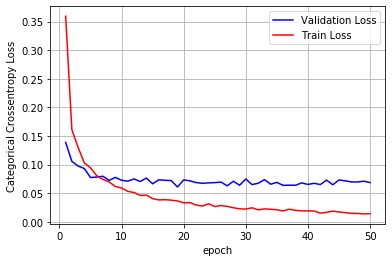

In [73]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

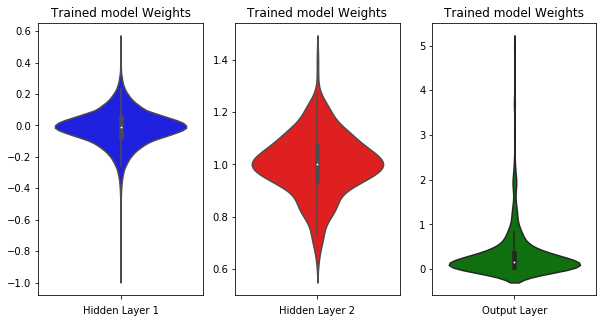

In [74]:
#monitoring weights to check if they are not overshooting
w_after = model_3_a_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [75]:
#finding loss and accuracy on test data
mlp_3_a_4_score = model_3_a_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_4_score[0]) 
print('Test accuracy:', mlp_3_a_4_score[1])

Test score: 0.0637187626097264
Test accuracy: 0.985


## MLP with 2 hidden layers, units: 512, 256, 128 with BatchNormalization with dropout(0.5)

In [76]:
#defining model architecture
model_3_a_5 = Sequential()

model_3_a_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_a_5.add(BatchNormalization())
model_3_a_5.add(Dropout(0.5))

model_3_a_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_5.add(BatchNormalization())
model_3_a_5.add(Dropout(0.5))

model_3_a_5.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a_5.add(BatchNormalization())
model_3_a_5.add(Dropout(0.5))

model_3_a_5.add(Dense(output_dim, activation="softmax")) #output layer

model_3_a_5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)             

In [77]:
model_3_a_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 40s 837us/step - loss: 0.5828 - acc: 0.8217 - val_loss: 0.1769 - val_acc: 0.9457
Epoch 2/50
48000/48000 [==============================] - 12s 257us/step - loss: 0.2587 - acc: 0.9234 - val_loss: 0.1291 - val_acc: 0.9595
Epoch 3/50
48000/48000 [==============================] - 14s 288us/step - loss: 0.2028 - acc: 0.9401 - val_loss: 0.1162 - val_acc: 0.9652
Epoch 4/50
48000/48000 [==============================] - 13s 263us/step - loss: 0.1690 - acc: 0.9506 - val_loss: 0.1043 - val_acc: 0.9687
Epoch 5/50
48000/48000 [==============================] - 14s 291us/step - loss: 0.1517 - acc: 0.9552 - val_loss: 0.0971 - val_acc: 0.9711
Epoch 6/50
48000/48000 [==============================] - 13s 280us/step - loss: 0.1348 - acc: 0.9596 - val_loss: 0.0950 - val_acc: 0.9727
Epoch 7/50
48000/48000 [==============================] - 15s 321us/step - loss: 0.1288 - acc: 0.9611 - val_loss: 0.

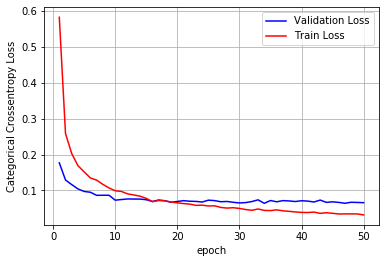

In [78]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

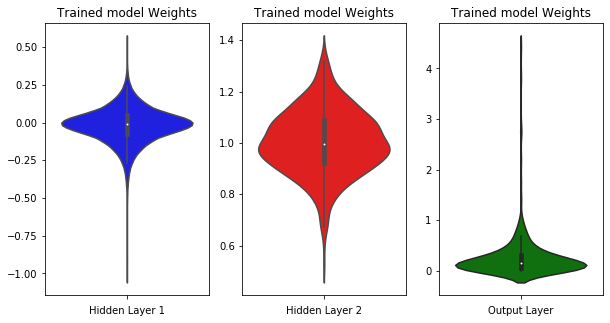

In [79]:
#monitoring weights to check if they are not overshooting
w_after = model_3_a_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [80]:
#finding loss and accuracy on test data
mlp_3_a_5_score = model_3_a_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_5_score[0]) 
print('Test accuracy:', mlp_3_a_5_score[1])

Test score: 0.062373665993422034
Test accuracy: 0.9844


## MLP with 3 hidden layers 1024, 512, 256

In [81]:
#defining model architecture
model_3_b_1 = Sequential()
model_3_b_1.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) 
model_3_b_1.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_3_b_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_3_b_1.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_3_b_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 547us/step - loss: 0.2276 - acc: 0.9314 - val_loss: 0.1133 - val_acc: 0.9658
Epoch 2/50
48000/48000 [==============================] - 21s 428us/step - loss: 0.0838 - acc: 0.9741 - val_loss: 0.1075 - val_acc: 0.9655
Epoch 3/50
48000/48000 [==============================] - 21s 429us/step - loss: 0.0534 - acc: 0.9830 - val_loss: 0.0863 - val_acc: 0.9740
Epoch 4/50
48000/48000 [==============================] - 21s 428us/step - loss: 0.0410 - acc: 0.9868 - val_loss: 0.0816 - val_acc: 0.9781
Epoch 5/50
48000/48000 [==============================] - 21s 433us/step - loss: 0.0322 - acc: 0.9896 - val_loss: 0.1007 - val_acc: 0.9720
Epoch 6/50
48000/48000 [==============================] - 21s 428us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0970 - val_acc: 0.9756
Epoch 7/50
48000/48000 [==============================] - 21s 438us/step - loss: 0.0228 - acc: 0.9923 - val_loss: 0.

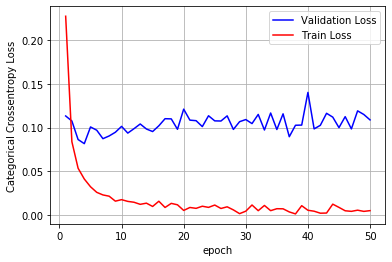

In [83]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

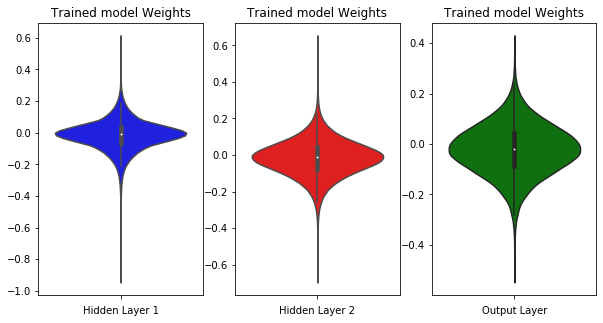

In [84]:
#monitoring weights to check if they are not overshooting
w_after = model_3_b_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [85]:
#finding loss and accuracy on test data
mlp_3_b_1_score = model_3_b_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_1_score[0]) 
print('Test accuracy:', mlp_3_b_1_score[1])

Test score: 0.10102805431166735
Test accuracy: 0.9831


## MLP with 3 hidden layers, units: 1024, 512, 256 with BatchNormalization

In [86]:
#defining model architecture
model_3_b_2 = Sequential()
model_3_b_2.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_b_2.add(BatchNormalization())

model_3_b_2.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_b_2.add(BatchNormalization())

model_3_b_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_3_b_2.add(BatchNormalization())

model_3_b_2.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b_2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_31 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_59 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_33 (Batc (None, 256)               1024      
_________________________________________________________________
dense_61 (Dense)             (None, 10)              

In [87]:
#building a simple model to compare loss with further models
model_3_b_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s 599us/step - loss: 0.1778 - acc: 0.9464 - val_loss: 0.1118 - val_acc: 0.9648
Epoch 2/50
48000/48000 [==============================] - 24s 510us/step - loss: 0.0731 - acc: 0.9761 - val_loss: 0.1113 - val_acc: 0.9681
Epoch 3/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.0492 - acc: 0.9837 - val_loss: 0.0909 - val_acc: 0.9717
Epoch 4/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0932 - val_acc: 0.9731
Epoch 5/50
48000/48000 [==============================] - 24s 509us/step - loss: 0.0339 - acc: 0.9883 - val_loss: 0.0864 - val_acc: 0.9750
Epoch 6/50
48000/48000 [==============================] - 24s 509us/step - loss: 0.0276 - acc: 0.9905 - val_loss: 0.0863 - val_acc: 0.9763
Epoch 7/50
48000/48000 [==============================] - 25s 514us/step - loss: 0.0228 - acc: 0.9923 - val_loss: 0.

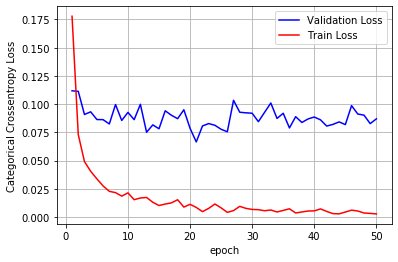

In [88]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

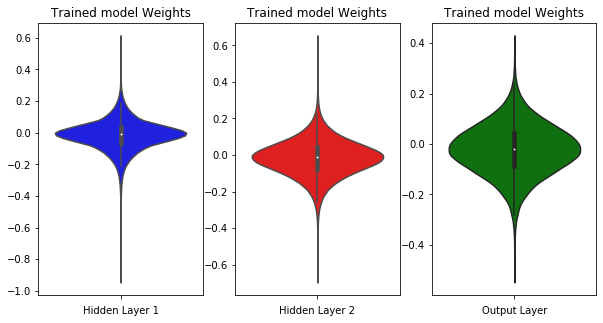

In [89]:
#monitoring weights to check if they are not overshooting
layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [90]:
#finding loss and accuracy on test data
mlp_3_b_2_score = model_3_b_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_2_score[0]) 
print('Test accuracy:', mlp_3_b_2_score[1])

Test score: 0.07873103855998374
Test accuracy: 0.983


## MLP with 3 hidden layers, units: 1024,512, 256 with BatchNormalization with dropout(0.2)

In [91]:
#defining model architecture
model_3_b_3 = Sequential()
model_3_b_3.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_b_3.add(BatchNormalization())
model_3_b_3.add(Dropout(0.2))

model_3_b_3.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_3.add(BatchNormalization())
model_3_b_3.add(Dropout(0.2))

model_3_b_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_3.add(BatchNormalization())
model_3_b_3.add(Dropout(0.2))

model_3_b_3.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b_3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_34 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)             

In [92]:
model_3_b_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 672us/step - loss: 0.2222 - acc: 0.9328 - val_loss: 0.1132 - val_acc: 0.9663
Epoch 2/50
48000/48000 [==============================] - 28s 581us/step - loss: 0.1032 - acc: 0.9677 - val_loss: 0.0938 - val_acc: 0.9712
Epoch 3/50
48000/48000 [==============================] - 28s 582us/step - loss: 0.0785 - acc: 0.9749 - val_loss: 0.0960 - val_acc: 0.9718
Epoch 4/50
48000/48000 [==============================] - 30s 634us/step - loss: 0.0621 - acc: 0.9802 - val_loss: 0.0760 - val_acc: 0.9773
Epoch 5/50
48000/48000 [==============================] - 29s 602us/step - loss: 0.0570 - acc: 0.9814 - val_loss: 0.0707 - val_acc: 0.9798
Epoch 6/50
48000/48000 [==============================] - 28s 587us/step - loss: 0.0467 - acc: 0.9844 - val_loss: 0.0743 - val_acc: 0.9780
Epoch 7/50
48000/48000 [==============================] - 27s 564us/step - loss: 0.0407 - acc: 0.9862 - val_loss: 0.

C:\Users\mishra_s\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.485704). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


48000/48000 [==============================] - 30s 632us/step - loss: 0.0157 - acc: 0.9947 - val_loss: 0.0726 - val_acc: 0.9829
Epoch 21/50
48000/48000 [==============================] - 27s 566us/step - loss: 0.0172 - acc: 0.9939 - val_loss: 0.0800 - val_acc: 0.9819
Epoch 22/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.0171 - acc: 0.9938 - val_loss: 0.0765 - val_acc: 0.9830
Epoch 23/50
48000/48000 [==============================] - 33s 689us/step - loss: 0.0190 - acc: 0.9934 - val_loss: 0.0765 - val_acc: 0.9824
Epoch 24/50
48000/48000 [==============================] - 28s 581us/step - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0678 - val_acc: 0.9843
Epoch 25/50
48000/48000 [==============================] - 35s 726us/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0732 - val_acc: 0.9835
Epoch 26/50
48000/48000 [==============================] - 35s 725us/step - loss: 0.0141 - acc: 0.9948 - val_loss: 0.0832 - val_acc: 0.9816
Epoch 27/50
48000/48000 [=======

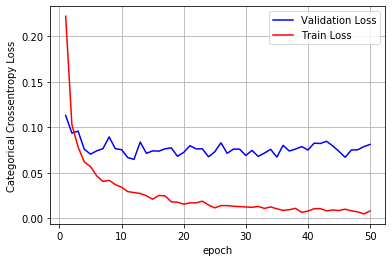

In [93]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

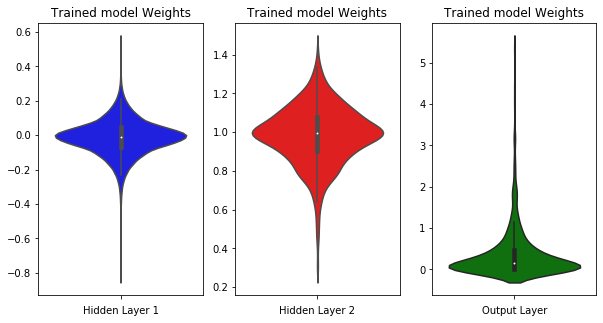

In [94]:
#monitoring weights to check if they are not overshooting
w_after = model_3_b_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [95]:
#finding loss and accuracy on test data
mlp_3_b_3_score = model_3_b_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_3_score[0]) 
print('Test accuracy:', mlp_3_b_3_score[1])

Test score: 0.07724339182826734
Test accuracy: 0.9827


## MLP with 3 hidden layers, units: 1024, 512,256 with BatchNormalization with dropout(0.3)

In [96]:
#defining model architecture
model_3_b_4 = Sequential()
model_3_b_4.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_b_4.add(BatchNormalization())
model_3_b_4.add(Dropout(0.3))

model_3_b_4.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_4.add(BatchNormalization())
model_3_b_4.add(Dropout(0.3))

model_3_b_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_4.add(BatchNormalization())
model_3_b_4.add(Dropout(0.3))

model_3_b_4.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b_4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_37 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)             

In [97]:
model_3_b_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 39s 810us/step - loss: 0.2752 - acc: 0.9161 - val_loss: 0.1084 - val_acc: 0.9656
Epoch 2/50
48000/48000 [==============================] - 31s 642us/step - loss: 0.1267 - acc: 0.9607 - val_loss: 0.0976 - val_acc: 0.9697
Epoch 3/50
48000/48000 [==============================] - 30s 632us/step - loss: 0.0977 - acc: 0.9690 - val_loss: 0.0881 - val_acc: 0.9722
Epoch 4/50
48000/48000 [==============================] - 30s 624us/step - loss: 0.0819 - acc: 0.9739 - val_loss: 0.0746 - val_acc: 0.9781
Epoch 5/50
48000/48000 [==============================] - 31s 646us/step - loss: 0.0715 - acc: 0.9775 - val_loss: 0.0763 - val_acc: 0.9768
Epoch 6/50
48000/48000 [==============================] - 29s 609us/step - loss: 0.0603 - acc: 0.9804 - val_loss: 0.0741 - val_acc: 0.9779
Epoch 7/50
48000/48000 [==============================] - 28s 588us/step - loss: 0.0541 - acc: 0.9820 - val_loss: 0.

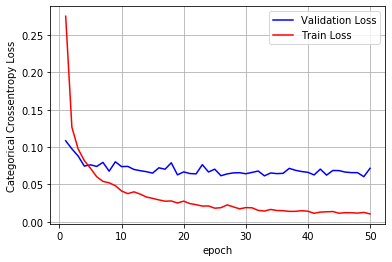

In [98]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

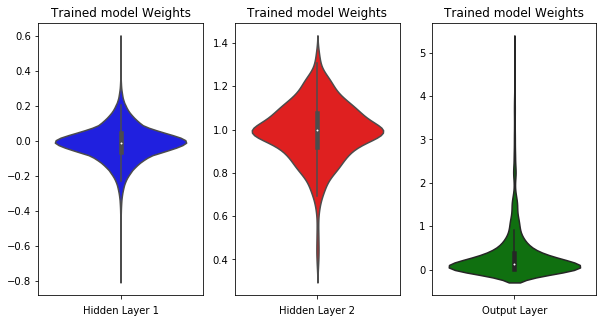

In [99]:
#monitoring weights to check if they are not overshooting
w_after = model_3_b_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [100]:
#finding loss and accuracy on test data
mlp_3_b_4_score = model_3_b_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_4_score[0]) 
print('Test accuracy:', mlp_3_b_4_score[1])

Test score: 0.06397292379256951
Test accuracy: 0.9857


## MLP with 3 hidden layers, units: 1024, 512, 256 with BatchNormalization with dropout(0.5)

In [101]:
#defining model architecture
model_3_b_5 = Sequential()

model_3_b_5.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_b_5.add(BatchNormalization())
model_3_b_5.add(Dropout(0.5))

model_3_b_5.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_5.add(BatchNormalization())
model_3_b_5.add(Dropout(0.5))

model_3_b_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b_5.add(BatchNormalization())
model_3_b_5.add(Dropout(0.5))

model_3_b_5.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b_5.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_40 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)             

In [102]:
model_3_b_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4220 - acc: 0.8724 - val_loss: 0.1454 - val_acc: 0.9573
Epoch 2/50
48000/48000 [==============================] - 35s 734us/step - loss: 0.1941 - acc: 0.9418 - val_loss: 0.1078 - val_acc: 0.9658
Epoch 3/50
48000/48000 [==============================] - 39s 823us/step - loss: 0.1545 - acc: 0.9529 - val_loss: 0.1046 - val_acc: 0.9664
Epoch 4/50
48000/48000 [==============================] - 39s 818us/step - loss: 0.1307 - acc: 0.9600 - val_loss: 0.0874 - val_acc: 0.9726
Epoch 5/50
48000/48000 [==============================] - 35s 733us/step - loss: 0.1131 - acc: 0.9645 - val_loss: 0.0803 - val_acc: 0.9758
Epoch 6/50
48000/48000 [==============================] - 41s 847us/step - loss: 0.1046 - acc: 0.9682 - val_loss: 0.0809 - val_acc: 0.9748
Epoch 7/50
48000/48000 [==============================] - 38s 784us/step - loss: 0.0973 - acc: 0.9688 - val_loss: 0.07

C:\Users\mishra_s\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.278595). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\mishra_s\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.640797). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


48000/48000 [==============================] - 40s 830us/step - loss: 0.0500 - acc: 0.9835 - val_loss: 0.0690 - val_acc: 0.9812
Epoch 21/50
48000/48000 [==============================] - 41s 846us/step - loss: 0.0502 - acc: 0.9835 - val_loss: 0.0705 - val_acc: 0.9811
Epoch 22/50
48000/48000 [==============================] - 33s 690us/step - loss: 0.0465 - acc: 0.9850 - val_loss: 0.0661 - val_acc: 0.9829
Epoch 23/50
48000/48000 [==============================] - 36s 744us/step - loss: 0.0456 - acc: 0.9848 - val_loss: 0.0630 - val_acc: 0.9836
Epoch 24/50
48000/48000 [==============================] - 41s 865us/step - loss: 0.0438 - acc: 0.9860 - val_loss: 0.0644 - val_acc: 0.9836
Epoch 25/50
48000/48000 [==============================] - 36s 760us/step - loss: 0.0417 - acc: 0.9863 - val_loss: 0.0691 - val_acc: 0.9823
Epoch 26/50
48000/48000 [==============================] - 37s 780us/step - loss: 0.0407 - acc: 0.9864 - val_loss: 0.0686 - val_acc: 0.9823
Epoch 27/50
48000/48000 [=======

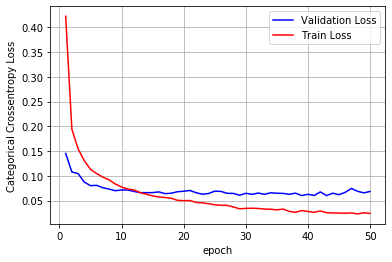

In [103]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

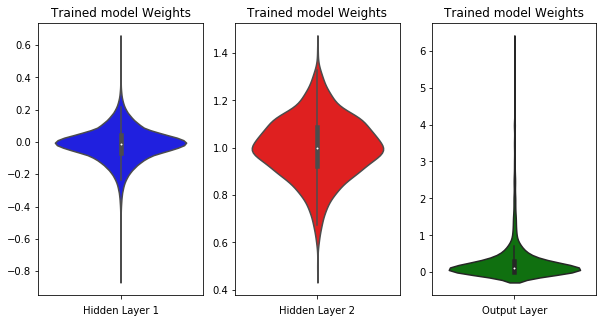

In [104]:
#monitoring weights to check if they are not overshooting
w_after = model_3_b_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [105]:
#finding loss and accuracy on test data
mlp_3_b_5_score = model_3_b_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_5_score[0]) 
print('Test accuracy:', mlp_3_b_5_score[1])

Test score: 0.06283799818071602
Test accuracy: 0.9845


## MLP with 3 hidden layers 256, 512, 1024

In [106]:
#defining model architecture
model_3_c_1 = Sequential()
model_3_c_1.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) 
model_3_c_1.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_3_c_1.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal"))
model_3_c_1.add(Dense(output_dim, activation="softmax")) #output layer

model_3_c_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_75 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_76 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_77 (Dense)             (None, 10)                10250     
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_3_c_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 445us/step - loss: 0.2513 - acc: 0.9236 - val_loss: 0.1450 - val_acc: 0.9535
Epoch 2/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.0907 - acc: 0.9721 - val_loss: 0.0959 - val_acc: 0.9712
Epoch 3/50
48000/48000 [==============================] - 13s 280us/step - loss: 0.0633 - acc: 0.9793 - val_loss: 0.1068 - val_acc: 0.9690
Epoch 4/50
48000/48000 [==============================] - 13s 280us/step - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0967 - val_acc: 0.9733
Epoch 5/50
48000/48000 [==============================] - 14s 289us/step - loss: 0.0377 - acc: 0.9875 - val_loss: 0.1005 - val_acc: 0.9725
Epoch 6/50
48000/48000 [==============================] - 14s 282us/step - loss: 0.0293 - acc: 0.9904 - val_loss: 0.1011 - val_acc: 0.9746
Epoch 7/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.

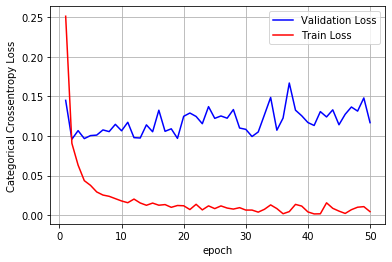

In [108]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

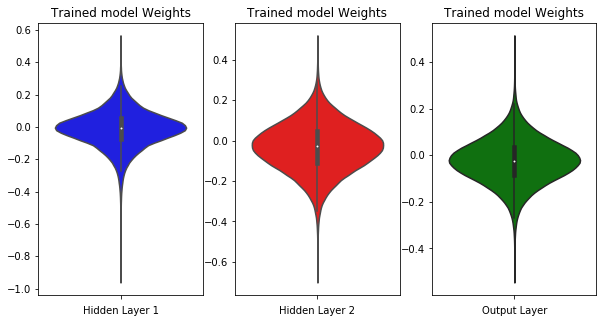

In [109]:
#monitoring weights to check if they are not overshooting
w_after = model_3_c_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [110]:
#finding loss and accuracy on test data
mlp_3_c_1_score = model_3_c_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_1_score[0]) 
print('Test accuracy:', mlp_3_c_1_score[1])

Test score: 0.11520138381142665
Test accuracy: 0.9814


## MLP with 3 hidden layers, units: 256, 512, 1024 with BatchNormalization

In [111]:
#defining model architecture
model_3_c_2 = Sequential()
model_3_c_2.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_c_2.add(BatchNormalization())

model_3_c_2.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_c_2.add(BatchNormalization())

model_3_c_2.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal")) 
model_3_c_2.add(BatchNormalization())

model_3_c_2.add(Dense(output_dim, activation="softmax")) #output layer

model_3_c_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024      
_________________________________________________________________
dense_79 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_44 (Batc (None, 512)               2048      
_________________________________________________________________
dense_80 (Dense)             (None, 1024)              525312    
_________________________________________________________________
batch_normalization_45 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_81 (Dense)             (None, 10)              

In [112]:
model_3_c_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 496us/step - loss: 0.2237 - acc: 0.9337 - val_loss: 0.1288 - val_acc: 0.9612
Epoch 2/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.0850 - acc: 0.9735 - val_loss: 0.1069 - val_acc: 0.9708
Epoch 3/50
48000/48000 [==============================] - 18s 384us/step - loss: 0.0615 - acc: 0.9800 - val_loss: 0.1163 - val_acc: 0.9671
Epoch 4/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.0474 - acc: 0.9844 - val_loss: 0.1020 - val_acc: 0.9719
Epoch 5/50
48000/48000 [==============================] - 19s 389us/step - loss: 0.0372 - acc: 0.9876 - val_loss: 0.1296 - val_acc: 0.9670
Epoch 6/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.0360 - acc: 0.9879 - val_loss: 0.0871 - val_acc: 0.9762os
Epoch 7/50
48000/48000 [==============================] - 18s 380us/step - loss: 0.0316 - acc: 0.9901 - val_loss: 

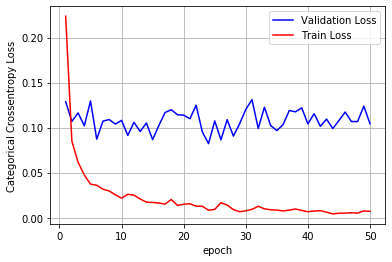

In [113]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

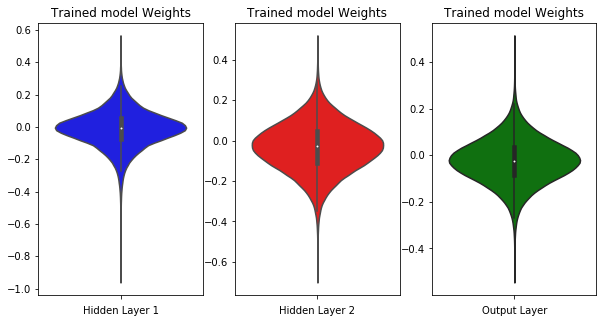

In [114]:
#monitoring weights to check if they are not overshooting
layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [115]:
#finding loss and accuracy on test data
mlp_3_c_2_score = model_3_c_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_2_score[0]) 
print('Test accuracy:', mlp_3_c_2_score[1])

Test score: 0.09726640014491895
Test accuracy: 0.9822


## MLP with 3 hidden layers, units: 256, 512, 1024 with BatchNormalization with dropout(0.2)

In [116]:
#defining model architecture
model_3_c_3 = Sequential()
model_3_c_3.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_c_3.add(BatchNormalization())
model_3_c_3.add(Dropout(0.2))

model_3_c_3.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_c_3.add(BatchNormalization())
model_3_c_3.add(Dropout(0.2))

model_3_c_3.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal")) 
model_3_c_3.add(BatchNormalization())
model_3_c_3.add(Dropout(0.2))

model_3_c_3.add(Dense(output_dim, activation="softmax")) #output layer


model_3_c_3.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_47 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 1024)            

In [117]:
model_3_c_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 27s 553us/step - loss: 0.3005 - acc: 0.9128 - val_loss: 0.1474 - val_acc: 0.9597
Epoch 2/50
48000/48000 [==============================] - 21s 434us/step - loss: 0.1367 - acc: 0.9572 - val_loss: 0.0994 - val_acc: 0.9706
Epoch 3/50
48000/48000 [==============================] - 20s 426us/step - loss: 0.1042 - acc: 0.9677 - val_loss: 0.0928 - val_acc: 0.9735
Epoch 4/50
48000/48000 [==============================] - 20s 423us/step - loss: 0.0871 - acc: 0.9712 - val_loss: 0.0933 - val_acc: 0.9739
Epoch 5/50
48000/48000 [==============================] - 20s 422us/step - loss: 0.0735 - acc: 0.9775 - val_loss: 0.0802 - val_acc: 0.9772
Epoch 6/50
48000/48000 [==============================] - 21s 430us/step - loss: 0.0684 - acc: 0.9776 - val_loss: 0.0932 - val_acc: 0.9749
Epoch 7/50
48000/48000 [==============================] - 20s 425us/step - loss: 0.0614 - acc: 0.9798 - val_loss: 0.

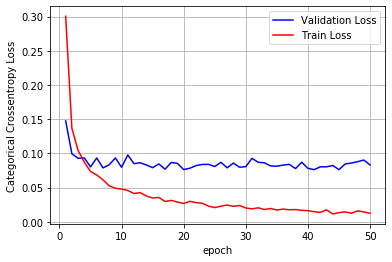

In [118]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

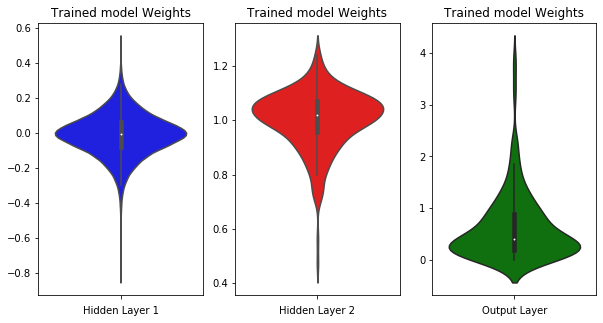

In [119]:
#monitoring weights to check if they are not overshooting
w_after = model_3_c_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [120]:
#finding loss and accuracy on test data
mlp_3_c_3_score = model_3_c_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_3_score[0]) 
print('Test accuracy:', mlp_3_c_3_score[1])

Test score: 0.08526080857268366
Test accuracy: 0.9828


## MLP with 3 hidden layers, units: 256, 512, 1024 with BatchNormalization with dropout(0.3)

In [121]:
#defining model architecture
model_3_c_4 = Sequential()
model_3_c_4.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_c_4.add(BatchNormalization())
model_3_c_4.add(Dropout(0.3))

model_3_c_4.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 1024 units
model_3_c_4.add(BatchNormalization())
model_3_c_4.add(Dropout(0.3))

model_3_c_4.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 1024 units
model_3_c_4.add(BatchNormalization())
model_3_c_4.add(Dropout(0.3))

model_3_c_4.add(Dense(output_dim, activation="softmax")) #output layer

model_3_c_4.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_50 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 1024)            

In [122]:
model_3_c_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 27s 557us/step - loss: 0.3618 - acc: 0.8942 - val_loss: 0.1457 - val_acc: 0.9567
Epoch 2/50
48000/48000 [==============================] - 21s 434us/step - loss: 0.1709 - acc: 0.9489 - val_loss: 0.1172 - val_acc: 0.9643
Epoch 3/50
48000/48000 [==============================] - 21s 437us/step - loss: 0.1344 - acc: 0.9586 - val_loss: 0.0959 - val_acc: 0.9706
Epoch 4/50
48000/48000 [==============================] - 21s 440us/step - loss: 0.1101 - acc: 0.9657 - val_loss: 0.0927 - val_acc: 0.9722
Epoch 5/50
48000/48000 [==============================] - 21s 434us/step - loss: 0.0947 - acc: 0.9688 - val_loss: 0.0894 - val_acc: 0.9751
Epoch 6/50
48000/48000 [==============================] - 21s 439us/step - loss: 0.0898 - acc: 0.9712 - val_loss: 0.0799 - val_acc: 0.9765
Epoch 7/50
48000/48000 [==============================] - 21s 439us/step - loss: 0.0809 - acc: 0.9738 - val_loss: 0.

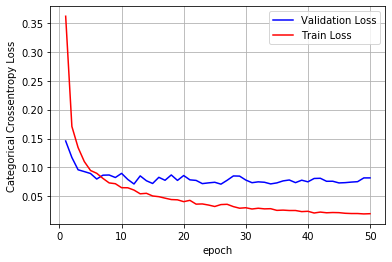

In [123]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

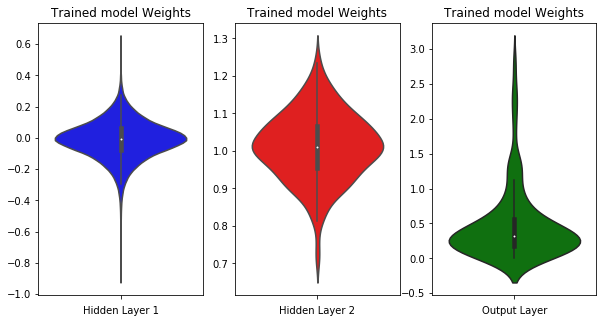

In [124]:
#monitoring weights to check if they are not overshooting
w_after = model_3_c_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [125]:
#finding loss and accuracy on test data
mlp_3_c_4_score = model_3_c_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_4_score[0]) 
print('Test accuracy:', mlp_3_c_4_score[1])

Test score: 0.07612625099721244
Test accuracy: 0.9842


## MLP with 3 hidden layers, units: 256, 512, 1024 with BatchNormalization with dropout(0.5)

In [126]:
#defining model architecture
model_3_c_5 = Sequential()

model_3_c_5.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_c_5.add(BatchNormalization())
model_3_c_5.add(Dropout(0.5))

model_3_c_5.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 1024 units
model_3_c_5.add(BatchNormalization())
model_3_c_5.add(Dropout(0.5))

model_3_c_5.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 1024 units
model_3_c_5.add(BatchNormalization())
model_3_c_5.add(Dropout(0.5))

model_3_c_5.add(Dense(output_dim, activation="softmax")) #output layer


model_3_c_5.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_52 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_53 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 1024)            

In [127]:
model_3_c_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 27s 566us/step - loss: 0.5634 - acc: 0.8407 - val_loss: 0.1870 - val_acc: 0.9438
Epoch 2/50
48000/48000 [==============================] - 22s 459us/step - loss: 0.2774 - acc: 0.9166 - val_loss: 0.1393 - val_acc: 0.9563
Epoch 3/50
48000/48000 [==============================] - 22s 448us/step - loss: 0.2162 - acc: 0.9339 - val_loss: 0.1216 - val_acc: 0.9622
Epoch 4/50
48000/48000 [==============================] - 21s 447us/step - loss: 0.1863 - acc: 0.9430 - val_loss: 0.1101 - val_acc: 0.9672
Epoch 5/50
48000/48000 [==============================] - 21s 440us/step - loss: 0.1697 - acc: 0.9490 - val_loss: 0.1026 - val_acc: 0.9683
Epoch 6/50
48000/48000 [==============================] - 21s 439us/step - loss: 0.1524 - acc: 0.9530 - val_loss: 0.0953 - val_acc: 0.9713
Epoch 7/50
48000/48000 [==============================] - 22s 458us/step - loss: 0.1420 - acc: 0.9557 - val_loss: 0.

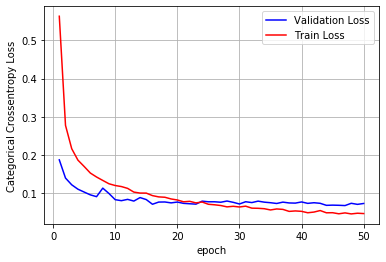

In [128]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

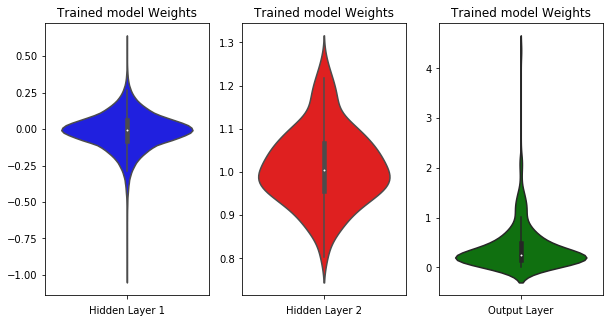

In [129]:
#monitoring weights to check if they are not overshooting
w_after = model_3_c_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [130]:
#finding loss and accuracy on test data
mlp_3_c_5_score = model_3_c_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_5_score[0]) 
print('Test accuracy:', mlp_3_c_5_score[1])

Test score: 0.05981130007819447
Test accuracy: 0.9828


## MLP with 3 hidden layers 1024, 512, 256 with he_normal initializer

In [131]:
#defining model architecture
model_3_d_1 = Sequential()
model_3_d_1.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) 
model_3_d_1.add(Dense(512, activation="relu", kernel_initializer="he_normal")) 
model_3_d_1.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model_3_d_1.add(Dense(output_dim, activation="softmax")) #output layer

model_3_d_1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_95 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_96 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_97 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [132]:
model_3_d_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
  640/48000 [..............................] - ETA: 2:32:22 - loss: 1.6421 - acc: 0.4938

C:\Users\mishra_s\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.347293). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


48000/48000 [==============================] - 150s 3ms/step - loss: 0.2156 - acc: 0.9349 - val_loss: 0.1144 - val_acc: 0.9640
Epoch 2/50
48000/48000 [==============================] - 24s 492us/step - loss: 0.0785 - acc: 0.9758 - val_loss: 0.0985 - val_acc: 0.9697
Epoch 3/50
48000/48000 [==============================] - 23s 477us/step - loss: 0.0526 - acc: 0.9826 - val_loss: 0.0823 - val_acc: 0.9756
Epoch 4/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0955 - val_acc: 0.9712
Epoch 5/50
48000/48000 [==============================] - 24s 496us/step - loss: 0.0314 - acc: 0.9896 - val_loss: 0.0832 - val_acc: 0.9782
Epoch 6/50
48000/48000 [==============================] - 25s 529us/step - loss: 0.0268 - acc: 0.9914 - val_loss: 0.0955 - val_acc: 0.9742
Epoch 7/50
48000/48000 [==============================] - 27s 556us/step - loss: 0.0231 - acc: 0.9928 - val_loss: 0.0882 - val_acc: 0.9784
Epoch 8/50
48000/48000 [===============

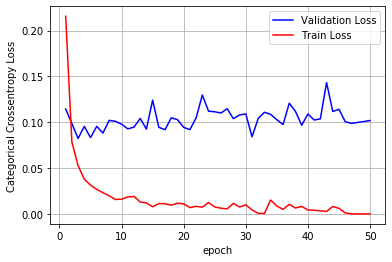

In [133]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

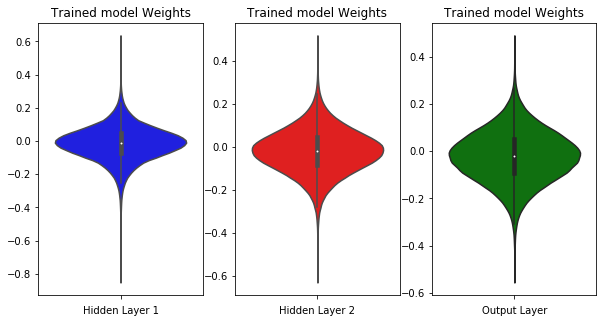

In [134]:
#monitoring weights to check if they are not overshooting
w_after = model_3_d_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [135]:
#finding loss and accuracy on test data
mlp_3_d_1_score = model_3_d_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_1_score[0]) 
print('Test accuracy:', mlp_3_d_1_score[1])

Test score: 0.10233012902849868
Test accuracy: 0.9849


## MLP with 3 hidden layers, units: 1024, 512, 256 with BatchNormalization

In [136]:
#defining model architecture
model_3_d_2 = Sequential()
model_3_d_2.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 512 units
model_3_d_2.add(BatchNormalization())

model_3_d_2.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model_3_d_2.add(BatchNormalization())

model_3_d_2.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_3_d_2.add(BatchNormalization())

model_3_d_2.add(Dense(output_dim, activation="softmax")) #output layer

model_3_d_2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_55 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_99 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_56 (Batc (None, 512)               2048      
_________________________________________________________________
dense_100 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_57 (Batc (None, 256)               1024      
_________________________________________________________________
dense_101 (Dense)            (None, 10)              

In [137]:
model_3_d_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 41s 863us/step - loss: 0.1778 - acc: 0.9454 - val_loss: 0.1030 - val_acc: 0.9671
Epoch 2/50
48000/48000 [==============================] - 31s 642us/step - loss: 0.0672 - acc: 0.9791 - val_loss: 0.0942 - val_acc: 0.9695
Epoch 3/50
48000/48000 [==============================] - 32s 668us/step - loss: 0.0446 - acc: 0.9857 - val_loss: 0.0957 - val_acc: 0.9709
Epoch 4/50
48000/48000 [==============================] - 30s 626us/step - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0837 - val_acc: 0.9760
Epoch 5/50
48000/48000 [==============================] - 30s 624us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0898 - val_acc: 0.9739
Epoch 6/50
48000/48000 [==============================] - 32s 677us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0774 - val_acc: 0.9768
Epoch 7/50
48000/48000 [==============================] - 32s 666us/step - loss: 0.0223 - acc: 0.9923 - val_loss: 0.

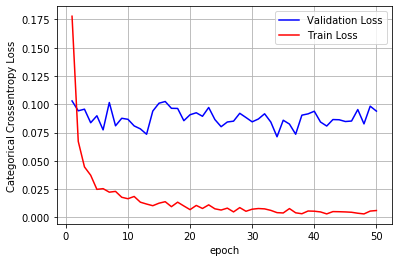

In [138]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

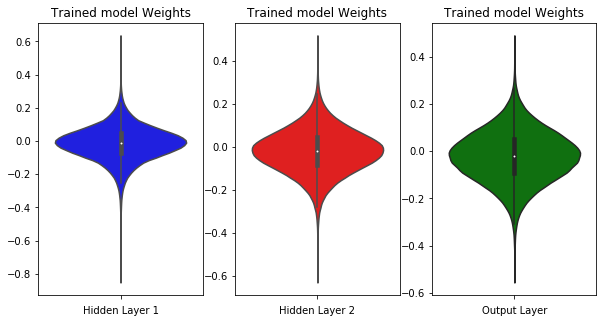

In [139]:
#monitoring weights to check if they are not overshooting
layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [140]:
#finding loss and accuracy on test data
mlp_3_d_2_score = model_3_d_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_2_score[0]) 
print('Test accuracy:', mlp_3_d_2_score[1])

Test score: 0.08716514100849009
Test accuracy: 0.981


## MLP with 3 hidden layers, units: 1024,512, 1024 with BatchNormalization with dropout(0.2)

In [141]:
#defining model architecture
model_3_d_3 = Sequential()
model_3_d_3.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 512 units
model_3_d_3.add(BatchNormalization())
model_3_d_3.add(Dropout(0.2))

model_3_d_3.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model_3_d_3.add(BatchNormalization())
model_3_d_3.add(Dropout(0.2))

model_3_d_3.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_3_d_3.add(BatchNormalization())
model_3_d_3.add(Dropout(0.2))

model_3_d_3.add(Dense(output_dim, activation="softmax")) #output layer


model_3_d_3.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_58 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_42 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_59 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 256)             

In [142]:
model_3_d_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 783us/step - loss: 0.2388 - acc: 0.9272 - val_loss: 0.1096 - val_acc: 0.9653
Epoch 2/50
48000/48000 [==============================] - 30s 621us/step - loss: 0.1038 - acc: 0.9670 - val_loss: 0.0948 - val_acc: 0.9704
Epoch 3/50
48000/48000 [==============================] - 30s 617us/step - loss: 0.0793 - acc: 0.9746 - val_loss: 0.0857 - val_acc: 0.9756
Epoch 4/50
48000/48000 [==============================] - 30s 632us/step - loss: 0.0586 - acc: 0.9805 - val_loss: 0.0741 - val_acc: 0.9782
Epoch 5/50
48000/48000 [==============================] - 30s 618us/step - loss: 0.0550 - acc: 0.9817 - val_loss: 0.0802 - val_acc: 0.9765
Epoch 6/50
48000/48000 [==============================] - 30s 618us/step - loss: 0.0445 - acc: 0.9847 - val_loss: 0.0819 - val_acc: 0.9756
Epoch 7/50
48000/48000 [==============================] - 29s 613us/step - loss: 0.0372 - acc: 0.9875 - val_loss: 0.

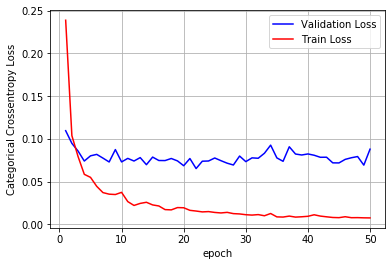

In [143]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

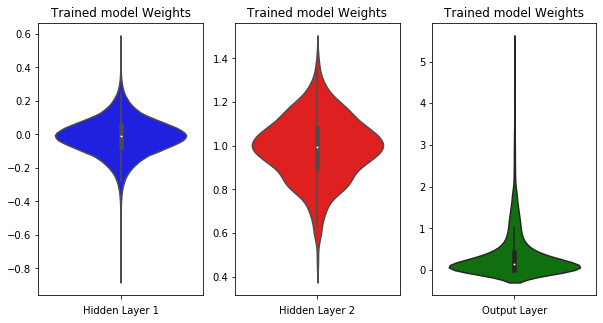

In [144]:
#monitoring weights to check if they are not overshooting
w_after = model_3_d_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [145]:
#finding loss and accuracy on test data
mlp_3_d_3_score = model_3_d_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_3_score[0]) 
print('Test accuracy:', mlp_3_d_3_score[1])

Test score: 0.08261543485408279
Test accuracy: 0.9825


## MLP with 3 hidden layers, units: 1024, 512,256 with BatchNormalization with dropout(0.3)

In [146]:
#defining model architecture
model_3_d_4 = Sequential()
model_3_d_4.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 512 units
model_3_d_4.add(BatchNormalization())
model_3_d_4.add(Dropout(0.3))

model_3_d_4.add(Dense(512, activation="relu", kernel_initializer="he_normal")) #second hidden layer with 1024 units
model_3_d_4.add(BatchNormalization())
model_3_d_4.add(Dropout(0.3))

model_3_d_4.add(Dense(256, activation="relu", kernel_initializer="he_normal")) #second hidden layer with 1024 units
model_3_d_4.add(BatchNormalization())
model_3_d_4.add(Dropout(0.3))

model_3_d_4.add(Dense(output_dim, activation="softmax")) #output layer

model_3_d_4.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_61 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_45 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_107 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_62 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 256)             

In [147]:
model_3_d_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 37s 771us/step - loss: 0.2844 - acc: 0.9126 - val_loss: 0.1081 - val_acc: 0.9669
Epoch 2/50
48000/48000 [==============================] - 30s 625us/step - loss: 0.1289 - acc: 0.9606 - val_loss: 0.0885 - val_acc: 0.9732
Epoch 3/50
48000/48000 [==============================] - 30s 626us/step - loss: 0.0980 - acc: 0.9692 - val_loss: 0.0805 - val_acc: 0.9755
Epoch 4/50
48000/48000 [==============================] - 31s 636us/step - loss: 0.0786 - acc: 0.9752 - val_loss: 0.0824 - val_acc: 0.9746
Epoch 5/50
48000/48000 [==============================] - 30s 626us/step - loss: 0.0674 - acc: 0.9790 - val_loss: 0.0755 - val_acc: 0.9773
Epoch 6/50
48000/48000 [==============================] - 30s 626us/step - loss: 0.0583 - acc: 0.9820 - val_loss: 0.0805 - val_acc: 0.9772
Epoch 7/50
48000/48000 [==============================] - 31s 637us/step - loss: 0.0555 - acc: 0.9822 - val_loss: 0.

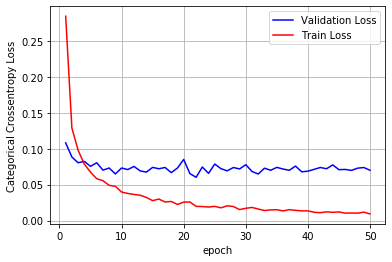

In [148]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

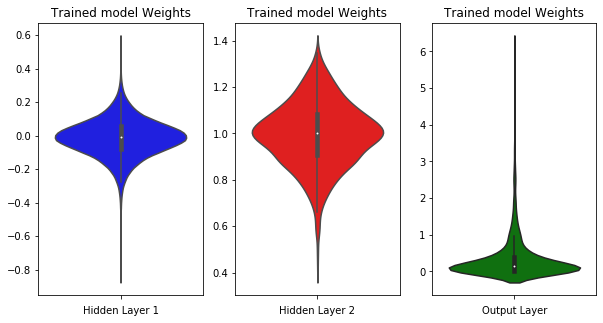

In [149]:
#monitoring weights to check if they are not overshooting
w_after = model_3_d_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [150]:
#finding loss and accuracy on test data
mlp_3_d_4_score = model_3_d_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_4_score[0]) 
print('Test accuracy:', mlp_3_d_4_score[1])

Test score: 0.0670375967930203
Test accuracy: 0.985


## MLP with 3 hidden layers, units: 1024, 512, 256 with BatchNormalization with dropout(0.5)

In [151]:
#defining model architecture
model_3_d_5 = Sequential()

model_3_d_5.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 512 units
model_3_d_5.add(BatchNormalization())
model_3_d_5.add(Dropout(0.5))

model_3_d_5.add(Dense(512, activation="relu", kernel_initializer="he_normal")) #second hidden layer with 1024 units
model_3_d_5.add(BatchNormalization())
model_3_d_5.add(Dropout(0.5))

model_3_d_5.add(Dense(256, activation="relu", kernel_initializer="he_normal")) #second hidden layer with 1024 units
model_3_d_5.add(BatchNormalization())
model_3_d_5.add(Dropout(0.5))

model_3_d_5.add(Dense(output_dim, activation="softmax")) #output layer


model_3_d_5.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_64 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_48 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_65 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 256)             

In [152]:
model_3_d_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 793us/step - loss: 0.4637 - acc: 0.8590 - val_loss: 0.1453 - val_acc: 0.9553
Epoch 2/50
48000/48000 [==============================] - 29s 602us/step - loss: 0.2070 - acc: 0.9377 - val_loss: 0.1147 - val_acc: 0.9637
Epoch 3/50
48000/48000 [==============================] - 29s 614us/step - loss: 0.1559 - acc: 0.9517 - val_loss: 0.0953 - val_acc: 0.9699
Epoch 4/50
48000/48000 [==============================] - 29s 599us/step - loss: 0.1282 - acc: 0.9605 - val_loss: 0.0919 - val_acc: 0.9721
Epoch 5/50
48000/48000 [==============================] - 29s 597us/step - loss: 0.1172 - acc: 0.9640 - val_loss: 0.0864 - val_acc: 0.9743
Epoch 6/50
48000/48000 [==============================] - 30s 617us/step - loss: 0.1061 - acc: 0.9667 - val_loss: 0.0764 - val_acc: 0.9778
Epoch 7/50
48000/48000 [==============================] - 29s 614us/step - loss: 0.0955 - acc: 0.9693 - val_loss: 0.

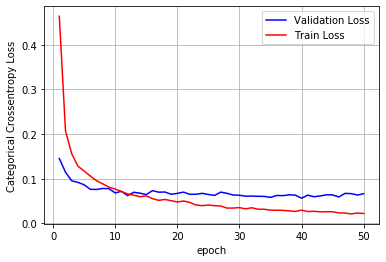

In [153]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

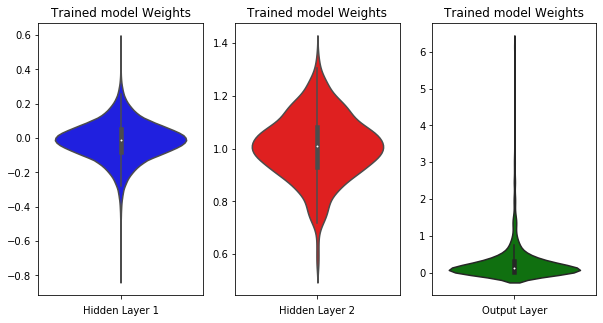

In [154]:
#monitoring weights to check if they are not overshooting
w_after = model_3_d_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [155]:
#finding loss and accuracy on test data
mlp_3_d_5_score = model_3_d_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_5_score[0]) 
print('Test accuracy:', mlp_3_d_5_score[1])

Test score: 0.06139937466061856
Test accuracy: 0.9856


In [259]:

table = PrettyTable();
table.field_names = ['# Units','BN', 'Dropout Rate', 'Initializer', 'score', 'Accuracy'];
table.add_row(['(512, 256, 128)', 'No', 'None', 'glorot_normal', mlp_3_a_1_score[0], mlp_3_a_1_score[1]])
table.add_row(['(512, 256, 128)', 'Yes', 'None', 'glorot_normal', mlp_3_a_2_score[0],mlp_3_a_2_score[1]])
table.add_row(['(512, 256, 128)', 'Yes', '0.2', 'glorot_normal', mlp_3_a_3_score[0], mlp_3_a_3_score[1]])
table.add_row(['(512, 256, 128)', 'Yes', '0.3', 'glorot_normal', mlp_3_a_4_score[0], mlp_3_a_4_score[1]])
table.add_row(['(512, 256, 128)', 'Yes', '0.5', 'glorot_normal', mlp_3_a_5_score[0], mlp_3_a_5_score[1]])

table.add_row(['(1024, 512, 256)', 'No', 'None', 'glorot_normal', mlp_3_b_1_score[0], mlp_3_b_1_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', 'None', 'glorot_normal', mlp_3_b_2_score[0],mlp_3_b_2_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.2', 'glorot_normal', mlp_3_b_3_score[0],mlp_3_b_3_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.3', 'glorot_normal', mlp_3_b_4_score[0],mlp_3_b_4_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.5', 'glorot_normal', mlp_3_b_5_score[0],mlp_3_b_5_score[1]])

table.add_row(['(256, 512, 1024)', 'No', 'None', 'glorot_normal', mlp_3_c_1_score[0], mlp_3_c_1_score[1]])
table.add_row(['(256, 512, 1024)', 'Yes', 'None', 'glorot_normal', mlp_3_c_2_score[0],mlp_3_c_2_score[1]])
table.add_row(['(256, 512, 1024)', 'Yes', '0.2', 'glorot_normal', mlp_3_c_3_score[0],mlp_3_c_3_score[1]])
table.add_row(['(256, 512, 1024)', 'Yes', '0.3', 'glorot_normal', mlp_3_c_4_score[0],mlp_3_c_4_score[1]])
table.add_row(['(256, 512, 1024)', 'Yes', '0.5', 'glorot_normal', mlp_3_c_5_score[0],mlp_3_c_5_score[1]])

table.add_row(['(1024, 512, 256)', 'No', 'None', 'he_normal', mlp_3_d_1_score[0], mlp_3_d_1_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', 'None', 'he_normal', mlp_3_d_2_score[0],mlp_3_d_2_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.2', 'he_normal', mlp_3_d_3_score[0],mlp_3_d_3_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.3', 'he_normal', mlp_3_d_4_score[0],mlp_3_d_4_score[1]])
table.add_row(['(1024, 512, 256)', 'Yes', '0.5', 'he_normal', mlp_3_d_5_score[0],mlp_3_d_5_score[1]])
print(table)


+------------------+-----+--------------+---------------+----------------------+----------+
|     # Units      |  BN | Dropout Rate |  Initializer  |        score         | Accuracy |
+------------------+-----+--------------+---------------+----------------------+----------+
| (512, 256, 128)  |  No |     None     | glorot_normal | 0.12432624776655347  |  0.9845  |
| (512, 256, 128)  | Yes |     None     | glorot_normal | 0.07941823251712994  |  0.9827  |
| (512, 256, 128)  | Yes |     0.2      | glorot_normal | 0.07654495402032795  |  0.9836  |
| (512, 256, 128)  | Yes |     0.3      | glorot_normal |  0.0637187626097264  |  0.985   |
| (512, 256, 128)  | Yes |     0.5      | glorot_normal | 0.062373665993422034 |  0.9844  |
| (1024, 512, 256) |  No |     None     | glorot_normal | 0.10102805431166735  |  0.9831  |
| (1024, 512, 256) | Yes |     None     | glorot_normal | 0.07873103855998374  |  0.983   |
| (1024, 512, 256) | Yes |     0.2      | glorot_normal | 0.07724339182826734  |

# MLP with 5 hidden layers

## MLP with 5 hidden layers (1024, 512, 256, 128, 64)

In [157]:
#defining model architecture
model_5_a_1 = Sequential()

model_5_a_1.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a_1.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_1.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_1.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_1.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a_1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_115 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_116 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_117 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_118 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_119 (Dense)            (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
___________________________________________

In [158]:
model_5_a_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s 587us/step - loss: 0.2564 - acc: 0.9217 - val_loss: 0.1446 - val_acc: 0.9557
Epoch 2/50
48000/48000 [==============================] - 22s 461us/step - loss: 0.0965 - acc: 0.9701 - val_loss: 0.1067 - val_acc: 0.9671
Epoch 3/50
48000/48000 [==============================] - 22s 455us/step - loss: 0.0673 - acc: 0.9791 - val_loss: 0.0823 - val_acc: 0.9742
Epoch 4/50
48000/48000 [==============================] - 22s 454us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0859 - val_acc: 0.9741
Epoch 5/50
48000/48000 [==============================] - 22s 460us/step - loss: 0.0424 - acc: 0.9869 - val_loss: 0.0966 - val_acc: 0.9732
Epoch 6/50
48000/48000 [==============================] - 23s 471us/step - loss: 0.0320 - acc: 0.9899 - val_loss: 0.1030 - val_acc: 0.9752
Epoch 7/50
48000/48000 [==============================] - 22s 468us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.

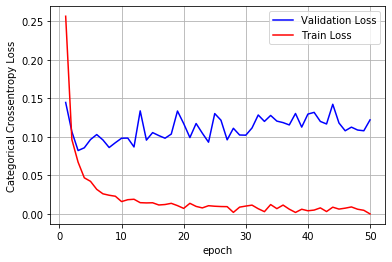

In [159]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

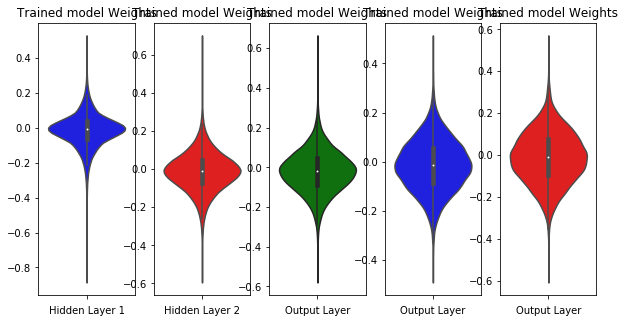

In [160]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [161]:
#finding loss and accuracy on test data
mlp_5_a_1_score = model_5_a_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_1_score[0]) 
print('Test accuracy:', mlp_5_a_1_score[1])

Test score: 0.11351816535617955
Test accuracy: 0.9849


## MLP with 5 hidden layers (1024, 512, 256, 128, 64) and BatchNormalization

In [162]:
#defining model architecture
model_5_a_2 = Sequential()

model_5_a_2.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a_2.add(BatchNormalization())

model_5_a_2.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_2.add(BatchNormalization())

model_5_a_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_2.add(BatchNormalization())

model_5_a_2.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_2.add(BatchNormalization())

model_5_a_2.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_2.add(BatchNormalization())

model_5_a_2.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a_2.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_67 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_121 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_68 (Batc (None, 512)               2048      
_________________________________________________________________
dense_122 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_69 (Batc (None, 256)               1024      
_________________________________________________________________
dense_123 (Dense)            (None, 128)             

In [163]:
model_5_a_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 783us/step - loss: 0.2091 - acc: 0.9382 - val_loss: 0.1163 - val_acc: 0.9649
Epoch 2/50
48000/48000 [==============================] - 30s 631us/step - loss: 0.0911 - acc: 0.9715 - val_loss: 0.0960 - val_acc: 0.9712
Epoch 3/50
48000/48000 [==============================] - 30s 634us/step - loss: 0.0640 - acc: 0.9791 - val_loss: 0.0857 - val_acc: 0.9721
Epoch 4/50
48000/48000 [==============================] - 30s 633us/step - loss: 0.0531 - acc: 0.9828 - val_loss: 0.0828 - val_acc: 0.9755
Epoch 5/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.0430 - acc: 0.9861 - val_loss: 0.0972 - val_acc: 0.9718
Epoch 6/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.0347 - acc: 0.9886 - val_loss: 0.0933 - val_acc: 0.9742
Epoch 7/50
48000/48000 [==============================] - 31s 640us/step - loss: 0.0357 - acc: 0.9880 - val_loss: 0.

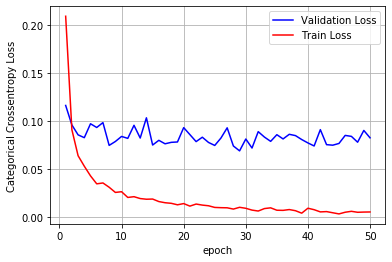

In [164]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

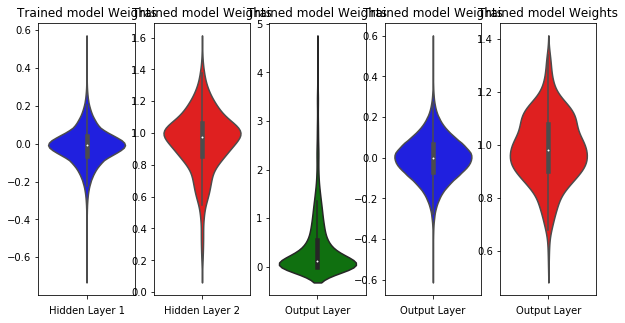

In [165]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [166]:
#finding loss and accuracy on test data
mlp_5_a_2_score = model_5_a_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_2_score[0]) 
print('Test accuracy:', mlp_5_a_2_score[1])

Test score: 0.0802678033330405
Test accuracy: 0.9825


## MLP with 5 hidden layers (1024, 512, 256, 128, 64) and BatchNormalization and dropout(0.2)

In [167]:
#defining model architecture
model_5_a_3 = Sequential()

model_5_a_3.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a_3.add(BatchNormalization())
model_5_a_3.add(Dropout(0.2))

model_5_a_3.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_3.add(BatchNormalization())
model_5_a_3.add(Dropout(0.2))

model_5_a_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_3.add(BatchNormalization())
model_5_a_3.add(Dropout(0.2))

model_5_a_3.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_3.add(BatchNormalization())
model_5_a_3.add(Dropout(0.2))

model_5_a_3.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_3.add(BatchNormalization())
model_5_a_3.add(Dropout(0.2))

model_5_a_3.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a_3.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_72 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_51 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_127 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_73 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 256)             

In [168]:
model_5_a_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 41s 859us/step - loss: 0.3300 - acc: 0.9026 - val_loss: 0.1288 - val_acc: 0.9628
Epoch 2/50
48000/48000 [==============================] - 33s 696us/step - loss: 0.1446 - acc: 0.9576 - val_loss: 0.1409 - val_acc: 0.9596
Epoch 3/50
48000/48000 [==============================] - 34s 700us/step - loss: 0.1096 - acc: 0.9674 - val_loss: 0.1025 - val_acc: 0.9696
Epoch 4/50
48000/48000 [==============================] - 34s 703us/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.0886 - val_acc: 0.9752
Epoch 5/50
48000/48000 [==============================] - 34s 713us/step - loss: 0.0781 - acc: 0.9764 - val_loss: 0.0877 - val_acc: 0.9748
Epoch 6/50
48000/48000 [==============================] - 34s 707us/step - loss: 0.0685 - acc: 0.9797 - val_loss: 0.0803 - val_acc: 0.9773
Epoch 7/50
48000/48000 [==============================] - 33s 698us/step - loss: 0.0655 - acc: 0.9799 - val_loss: 0.

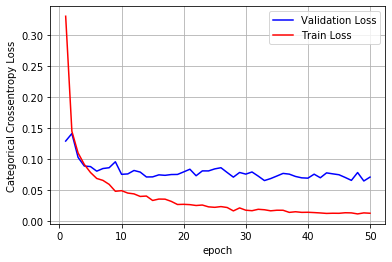

In [169]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

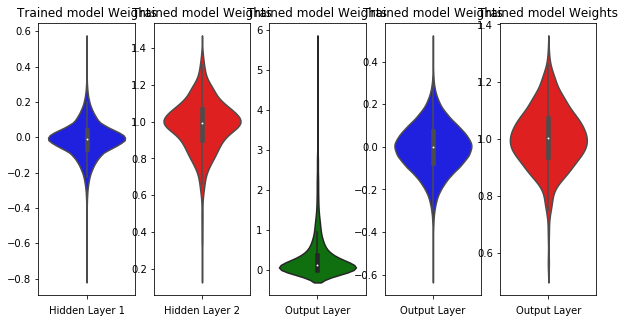

In [170]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [171]:
#finding loss and accuracy on test data
mlp_5_a_3_score = model_5_a_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_3_score[0]) 
print('Test accuracy:', mlp_5_a_3_score[1])

Test score: 0.06176523314721999
Test accuracy: 0.9856


## MLP with 5 hidden layers (1024, 512, 256, 128, 64) and BatchNormalization and dropout(0.3)

In [172]:
#defining model architecture
model_5_a_4 = Sequential()

model_5_a_4.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a_4.add(BatchNormalization())
model_5_a_4.add(Dropout(0.3))

model_5_a_4.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_4.add(BatchNormalization())
model_5_a_4.add(Dropout(0.3))

model_5_a_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_4.add(BatchNormalization())
model_5_a_4.add(Dropout(0.3))

model_5_a_4.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_4.add(BatchNormalization())
model_5_a_4.add(Dropout(0.3))

model_5_a_4.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_4.add(BatchNormalization())
model_5_a_4.add(Dropout(0.3))

model_5_a_4.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a_4.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_77 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_56 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_133 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_78 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 256)             

In [173]:
model_5_a_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 42s 884us/step - loss: 0.4562 - acc: 0.8645 - val_loss: 0.1615 - val_acc: 0.9547
Epoch 2/50
48000/48000 [==============================] - 34s 708us/step - loss: 0.1879 - acc: 0.9473 - val_loss: 0.1192 - val_acc: 0.9662
Epoch 3/50
48000/48000 [==============================] - 34s 711us/step - loss: 0.1402 - acc: 0.9603 - val_loss: 0.1003 - val_acc: 0.9721
Epoch 4/50
48000/48000 [==============================] - 34s 705us/step - loss: 0.1169 - acc: 0.9665 - val_loss: 0.0930 - val_acc: 0.9721
Epoch 5/50
48000/48000 [==============================] - 34s 707us/step - loss: 0.1094 - acc: 0.9687 - val_loss: 0.0793 - val_acc: 0.9768
Epoch 6/50
48000/48000 [==============================] - 34s 710us/step - loss: 0.0918 - acc: 0.9738 - val_loss: 0.0957 - val_acc: 0.9739
Epoch 7/50
48000/48000 [==============================] - 34s 703us/step - loss: 0.0842 - acc: 0.9761 - val_loss: 0.

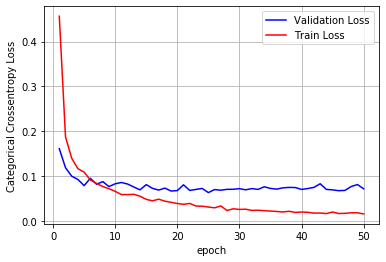

In [174]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

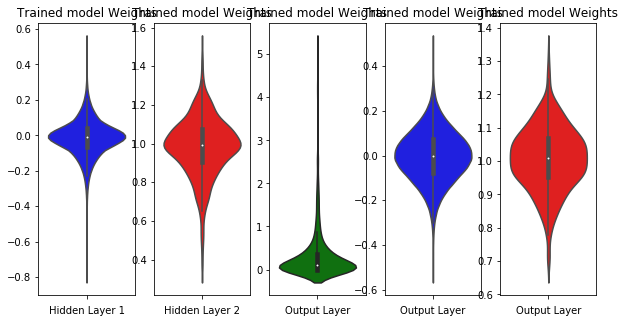

In [175]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [176]:
#finding loss and accuracy on test data
mlp_5_a_4_score = model_5_a_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_4_score[0]) 
print('Test accuracy:', mlp_5_a_4_score[1])

Test score: 0.06816437180633657
Test accuracy: 0.9843


## MLP with 5 hidden layers (1024, 512, 256, 128, 64) and BatchNormalization and dropout(0.5)

In [177]:
#defining model architecture
model_5_a_5 = Sequential()

model_5_a_5.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a_5.add(BatchNormalization())
model_5_a_5.add(Dropout(0.5))

model_5_a_5.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_5.add(BatchNormalization())
model_5_a_5.add(Dropout(0.5))

model_5_a_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_5.add(BatchNormalization())
model_5_a_5.add(Dropout(0.5))

model_5_a_5.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_5.add(BatchNormalization())
model_5_a_5.add(Dropout(0.5))

model_5_a_5.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a_5.add(BatchNormalization())
model_5_a_5.add(Dropout(0.5))

model_5_a_5.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a_5.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 1024)              803840    
_________________________________________________________________
batch_normalization_82 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_61 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_139 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_83 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 256)             

In [178]:
model_5_a_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 43s 899us/step - loss: 0.9452 - acc: 0.7055 - val_loss: 0.2051 - val_acc: 0.9400
Epoch 2/50
48000/48000 [==============================] - 35s 724us/step - loss: 0.3318 - acc: 0.9102 - val_loss: 0.1479 - val_acc: 0.9575
Epoch 3/50
48000/48000 [==============================] - 35s 729us/step - loss: 0.2514 - acc: 0.9331 - val_loss: 0.1423 - val_acc: 0.9612
Epoch 4/50
48000/48000 [==============================] - 35s 729us/step - loss: 0.2078 - acc: 0.9458 - val_loss: 0.1233 - val_acc: 0.9657
Epoch 5/50
48000/48000 [==============================] - 35s 725us/step - loss: 0.1830 - acc: 0.9517 - val_loss: 0.1052 - val_acc: 0.9714
Epoch 6/50
48000/48000 [==============================] - 35s 724us/step - loss: 0.1702 - acc: 0.9559 - val_loss: 0.1054 - val_acc: 0.9712
Epoch 7/50
48000/48000 [==============================] - 35s 725us/step - loss: 0.1503 - acc: 0.9604 - val_loss: 0.

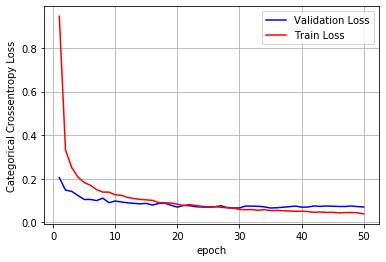

In [179]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

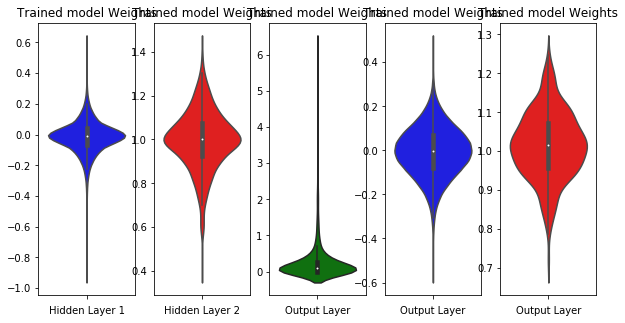

In [180]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [181]:
#finding loss and accuracy on test data
mlp_5_a_5_score = model_5_a_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_5_score[0]) 
print('Test accuracy:', mlp_5_a_5_score[1])

Test score: 0.06747064908958855
Test accuracy: 0.9849


## MLP with 5 hidden layers (512, 256, 128, 64, 32)

In [182]:
#defining model architecture
model_5_b_1 = Sequential()

model_5_b_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_b_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_1.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_1.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_1.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_1.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b_1.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_145 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_146 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_147 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_148 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_149 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [183]:
model_5_b_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 385us/step - loss: 0.3090 - acc: 0.9074 - val_loss: 0.1365 - val_acc: 0.9601
Epoch 2/50
48000/48000 [==============================] - 11s 239us/step - loss: 0.1051 - acc: 0.9685 - val_loss: 0.1011 - val_acc: 0.9693
Epoch 3/50
48000/48000 [==============================] - 11s 237us/step - loss: 0.0704 - acc: 0.9790 - val_loss: 0.0940 - val_acc: 0.9717
Epoch 4/50
48000/48000 [==============================] - 11s 235us/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0952 - val_acc: 0.9724
Epoch 5/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.0358 - acc: 0.9880 - val_loss: 0.0977 - val_acc: 0.9748
Epoch 6/50
48000/48000 [==============================] - 11s 234us/step - loss: 0.0326 - acc: 0.9893 - val_loss: 0.1052 - val_acc: 0.9738
Epoch 7/50
48000/48000 [==============================] - 11s 234us/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.

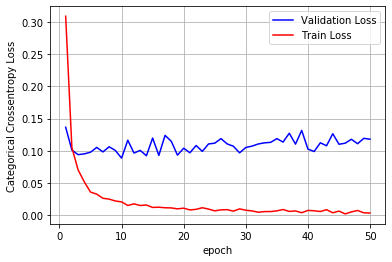

In [184]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

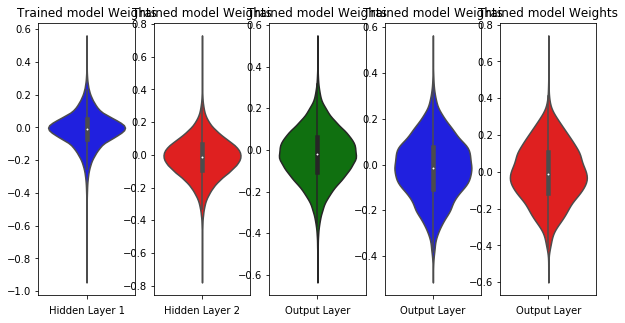

In [185]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [186]:
#finding loss and accuracy on test data
mlp_5_b_1_score = model_5_b_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_1_score[0]) 
print('Test accuracy:', mlp_5_b_1_score[1])

Test score: 0.10854551430993133
Test accuracy: 0.9801


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization

In [187]:
#defining model architecture
model_5_b_2 = Sequential()

model_5_b_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_b_2.add(BatchNormalization())

model_5_b_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_2.add(BatchNormalization())

model_5_b_2.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_2.add(BatchNormalization())

model_5_b_2.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_2.add(BatchNormalization())

model_5_b_2.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_2.add(BatchNormalization())

model_5_b_2.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b_2.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_87 (Batc (None, 512)               2048      
_________________________________________________________________
dense_151 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_88 (Batc (None, 256)               1024      
_________________________________________________________________
dense_152 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_89 (Batc (None, 128)               512       
_________________________________________________________________
dense_153 (Dense)            (None, 64)              

In [188]:
model_5_b_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 27s 573us/step - loss: 0.2738 - acc: 0.9253 - val_loss: 0.1285 - val_acc: 0.9612
Epoch 2/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.0998 - acc: 0.9701 - val_loss: 0.1106 - val_acc: 0.9672
Epoch 3/50
48000/48000 [==============================] - 19s 389us/step - loss: 0.0671 - acc: 0.9798 - val_loss: 0.0969 - val_acc: 0.9709
Epoch 4/50
48000/48000 [==============================] - 19s 390us/step - loss: 0.0551 - acc: 0.9826 - val_loss: 0.1001 - val_acc: 0.9716
Epoch 5/50
48000/48000 [==============================] - 19s 390us/step - loss: 0.0459 - acc: 0.9856 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 6/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.0406 - acc: 0.9874 - val_loss: 0.0895 - val_acc: 0.9756
Epoch 7/50
48000/48000 [==============================] - 19s 393us/step - loss: 0.0334 - acc: 0.9889 - val_loss: 0.

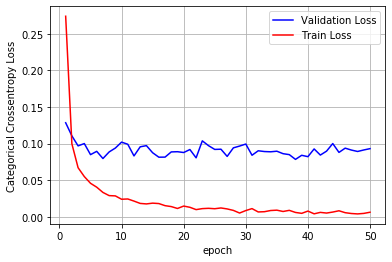

In [189]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

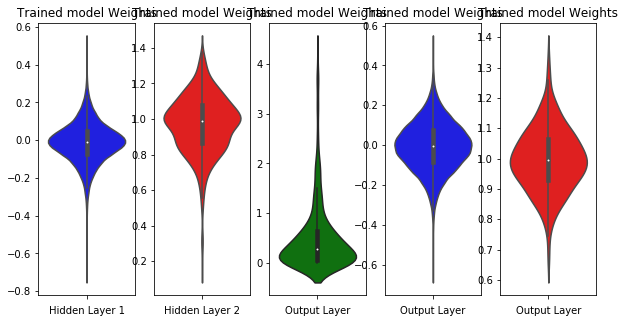

In [190]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [191]:
#finding loss and accuracy on test data

mlp_5_b_2_score = model_5_b_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_2_score[0]) 
print('Test accuracy:', mlp_5_b_2_score[1])

Test score: 0.10454819987511874
Test accuracy: 0.9796


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.2)

In [192]:
#defining model architecture
model_5_b_3 = Sequential()

model_5_b_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_b_3.add(BatchNormalization())
model_5_b_3.add(Dropout(0.2))

model_5_b_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_3.add(BatchNormalization())
model_5_b_3.add(Dropout(0.2))

model_5_b_3.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_3.add(BatchNormalization())
model_5_b_3.add(Dropout(0.2))

model_5_b_3.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_3.add(BatchNormalization())
model_5_b_3.add(Dropout(0.2))

model_5_b_3.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_3.add(BatchNormalization())
model_5_b_3.add(Dropout(0.2))

model_5_b_3.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b_3.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_92 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_157 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_93 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_67 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 128)             

In [193]:
model_5_b_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 657us/step - loss: 0.5202 - acc: 0.8542 - val_loss: 0.1518 - val_acc: 0.9563
Epoch 2/50
48000/48000 [==============================] - 23s 470us/step - loss: 0.1980 - acc: 0.9465 - val_loss: 0.1363 - val_acc: 0.9601
Epoch 3/50
48000/48000 [==============================] - 23s 469us/step - loss: 0.1481 - acc: 0.9592 - val_loss: 0.1040 - val_acc: 0.9701
Epoch 4/50
48000/48000 [==============================] - 22s 467us/step - loss: 0.1217 - acc: 0.9673 - val_loss: 0.1026 - val_acc: 0.9708
Epoch 5/50
48000/48000 [==============================] - 22s 464us/step - loss: 0.1082 - acc: 0.9695 - val_loss: 0.1004 - val_acc: 0.9722
Epoch 6/50
48000/48000 [==============================] - 22s 463us/step - loss: 0.0928 - acc: 0.9739 - val_loss: 0.0942 - val_acc: 0.9738
Epoch 7/50
48000/48000 [==============================] - 22s 465us/step - loss: 0.0850 - acc: 0.9756 - val_loss: 0.

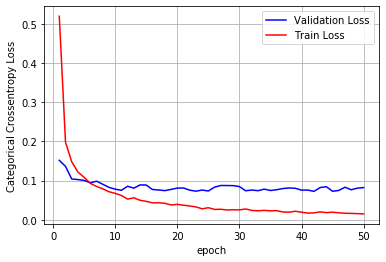

In [194]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

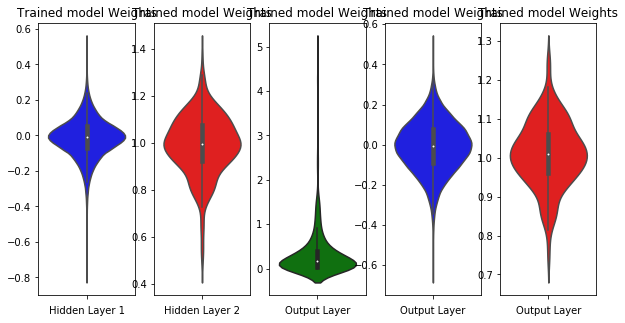

In [195]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [196]:
#finding loss and accuracy on test data
mlp_5_b_3_score = model_5_b_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_3_score[0]) 
print('Test accuracy:', mlp_5_b_3_score[1])

Test score: 0.08161842007254745
Test accuracy: 0.9836


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.3)

In [197]:
#defining model architecture
model_5_b_4 = Sequential()

model_5_b_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_b_4.add(BatchNormalization())
model_5_b_4.add(Dropout(0.3))

model_5_b_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_4.add(BatchNormalization())
model_5_b_4.add(Dropout(0.3))

model_5_b_4.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_4.add(BatchNormalization())
model_5_b_4.add(Dropout(0.3))

model_5_b_4.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_4.add(BatchNormalization())
model_5_b_4.add(Dropout(0.3))

model_5_b_4.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_4.add(BatchNormalization())
model_5_b_4.add(Dropout(0.3))

model_5_b_4.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b_4.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_97 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_98 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_72 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 128)             

In [198]:
model_5_b_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 678us/step - loss: 0.7155 - acc: 0.7889 - val_loss: 0.1700 - val_acc: 0.9503
Epoch 2/50
48000/48000 [==============================] - 23s 481us/step - loss: 0.2651 - acc: 0.9310 - val_loss: 0.1313 - val_acc: 0.9618
Epoch 3/50
48000/48000 [==============================] - 23s 481us/step - loss: 0.2028 - acc: 0.9463 - val_loss: 0.1193 - val_acc: 0.9672
Epoch 4/50
48000/48000 [==============================] - 23s 481us/step - loss: 0.1617 - acc: 0.9586 - val_loss: 0.1109 - val_acc: 0.9708
Epoch 5/50
48000/48000 [==============================] - 23s 481us/step - loss: 0.1462 - acc: 0.9618 - val_loss: 0.0963 - val_acc: 0.9737
Epoch 6/50
48000/48000 [==============================] - 23s 480us/step - loss: 0.1302 - acc: 0.9662 - val_loss: 0.1062 - val_acc: 0.9718
Epoch 7/50
48000/48000 [==============================] - 23s 483us/step - loss: 0.1210 - acc: 0.9680 - val_loss: 0.

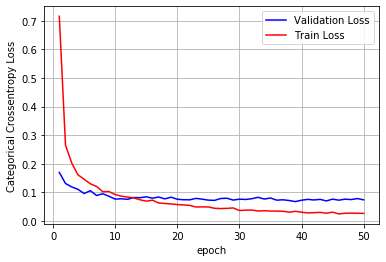

In [199]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

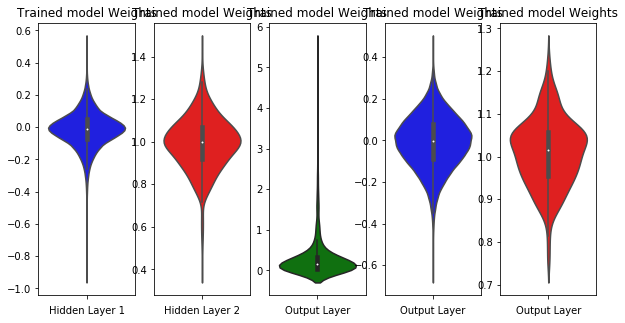

In [200]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [201]:
#finding loss and accuracy on test data
mlp_5_b_4_score = model_5_b_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_4_score[0]) 
print('Test accuracy:', mlp_5_b_4_score[1])

Test score: 0.07815635312084923
Test accuracy: 0.9841


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.5)

In [202]:
#defining model architecture
model_5_b_5 = Sequential()

model_5_b_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_b_5.add(BatchNormalization())
model_5_b_5.add(Dropout(0.5))

model_5_b_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_5.add(BatchNormalization())
model_5_b_5.add(Dropout(0.5))

model_5_b_5.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_5.add(BatchNormalization())
model_5_b_5.add(Dropout(0.5))

model_5_b_5.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_5.add(BatchNormalization())
model_5_b_5.add(Dropout(0.5))

model_5_b_5.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b_5.add(BatchNormalization())
model_5_b_5.add(Dropout(0.5))

model_5_b_5.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b_5.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_102 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_76 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_103 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_77 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 128)             

In [203]:
model_5_b_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 34s 702us/step - loss: 1.5799 - acc: 0.4925 - val_loss: 0.3494 - val_acc: 0.9121loss: 1.6685 - acc: 0. 
Epoch 2/50
48000/48000 [==============================] - 23s 476us/step - loss: 0.6352 - acc: 0.8217 - val_loss: 0.2139 - val_acc: 0.9407
Epoch 3/50
48000/48000 [==============================] - 23s 476us/step - loss: 0.4351 - acc: 0.8880 - val_loss: 0.1743 - val_acc: 0.9524
Epoch 4/50
48000/48000 [==============================] - 23s 478us/step - loss: 0.3568 - acc: 0.9125 - val_loss: 0.1535 - val_acc: 0.9605
Epoch 5/50
48000/48000 [==============================] - 23s 477us/step - loss: 0.3136 - acc: 0.9259 - val_loss: 0.1466 - val_acc: 0.9620
Epoch 6/50
48000/48000 [==============================] - 23s 473us/step - loss: 0.2750 - acc: 0.9353 - val_loss: 0.1375 - val_acc: 0.9653
Epoch 7/50
48000/48000 [==============================] - 23s 473us/step - loss: 0.2499 - acc

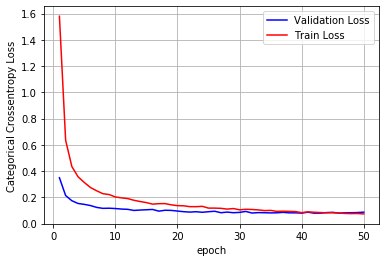

In [204]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

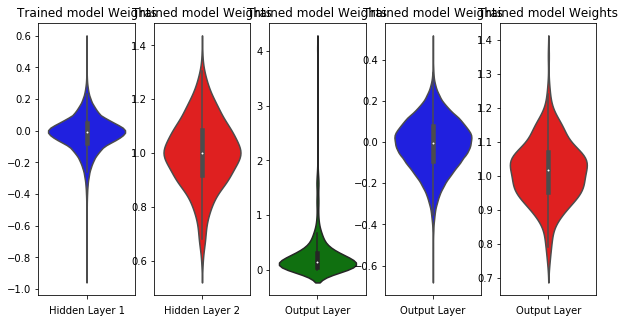

In [205]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [206]:

#finding loss and accuracy on test data
mlp_5_b_5_score = model_5_b_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_5_score[0]) 
print('Test accuracy:', mlp_5_b_5_score[1])

Test score: 0.07726216717707285
Test accuracy: 0.984


## MLP with 5 hidden layers (512, 256, 128, 64, 16)

In [207]:
#defining model architecture
model_5_c_1 = Sequential()

model_5_c_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_c_1.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_1.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_1.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_1.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_1.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c_1.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_175 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_176 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_177 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_178 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_179 (Dense)            (None, 10)                170       
Total params: 575,610
Trainable params: 575,610
Non-trainable params: 0
_______________________________________________

In [208]:
model_5_c_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 445us/step - loss: 0.3203 - acc: 0.9074 - val_loss: 0.1723 - val_acc: 0.9497
Epoch 2/50
48000/48000 [==============================] - 13s 264us/step - loss: 0.1069 - acc: 0.9678 - val_loss: 0.1114 - val_acc: 0.9666
Epoch 3/50
48000/48000 [==============================] - 13s 265us/step - loss: 0.0705 - acc: 0.9786 - val_loss: 0.0925 - val_acc: 0.9731
Epoch 4/50
48000/48000 [==============================] - 13s 266us/step - loss: 0.0504 - acc: 0.9841 - val_loss: 0.0905 - val_acc: 0.9738
Epoch 5/50
48000/48000 [==============================] - 13s 264us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0925 - val_acc: 0.9750
Epoch 6/50
48000/48000 [==============================] - 13s 265us/step - loss: 0.0360 - acc: 0.9883 - val_loss: 0.0857 - val_acc: 0.9762
Epoch 7/50
48000/48000 [==============================] - 13s 266us/step - loss: 0.0262 - acc: 0.9911 - val_loss: 0.

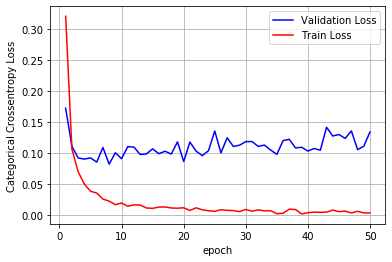

In [209]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

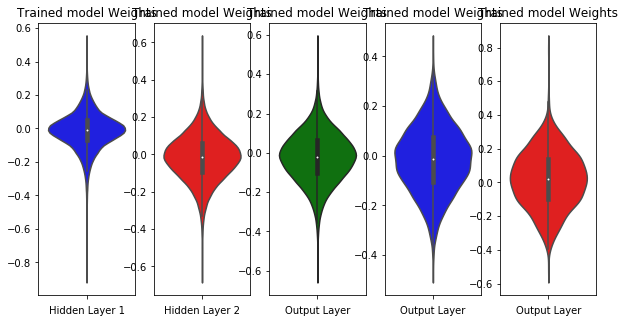

In [210]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [211]:
#finding loss and accuracy on test data
mlp_5_c_1_score = model_5_c_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_1_score[0]) 
print('Test accuracy:', mlp_5_c_1_score[1])

Test score: 0.11631212899430775
Test accuracy: 0.9812


## MLP with 5 hidden layers (512, 256, 128, 64, 16) and BatchNormalization

In [212]:
#defining model architecture
model_5_c_2 = Sequential()

model_5_c_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_c_2.add(BatchNormalization())

model_5_c_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_2.add(BatchNormalization())

model_5_c_2.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_2.add(BatchNormalization())

model_5_c_2.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_2.add(BatchNormalization())

model_5_c_2.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_2.add(BatchNormalization())

model_5_c_2.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c_2.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_107 (Bat (None, 512)               2048      
_________________________________________________________________
dense_181 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_108 (Bat (None, 256)               1024      
_________________________________________________________________
dense_182 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_109 (Bat (None, 128)               512       
_________________________________________________________________
dense_183 (Dense)            (None, 64)              

In [213]:
model_5_c_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 666us/step - loss: 0.3250 - acc: 0.9212 - val_loss: 0.1406 - val_acc: 0.9645
Epoch 2/50
48000/48000 [==============================] - 21s 447us/step - loss: 0.1095 - acc: 0.9695 - val_loss: 0.1410 - val_acc: 0.9582
Epoch 3/50
48000/48000 [==============================] - 21s 447us/step - loss: 0.0732 - acc: 0.9784 - val_loss: 0.1060 - val_acc: 0.9684
Epoch 4/50
48000/48000 [==============================] - 21s 445us/step - loss: 0.0602 - acc: 0.9816 - val_loss: 0.1016 - val_acc: 0.9717
Epoch 5/50
48000/48000 [==============================] - 21s 442us/step - loss: 0.0455 - acc: 0.9858 - val_loss: 0.0901 - val_acc: 0.9742
Epoch 6/50
48000/48000 [==============================] - 21s 442us/step - loss: 0.0378 - acc: 0.9880 - val_loss: 0.0918 - val_acc: 0.9746
Epoch 7/50
48000/48000 [==============================] - 21s 444us/step - loss: 0.0339 - acc: 0.9895 - val_loss: 0.

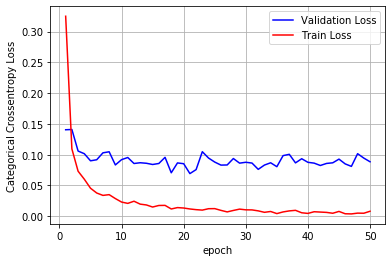

In [214]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

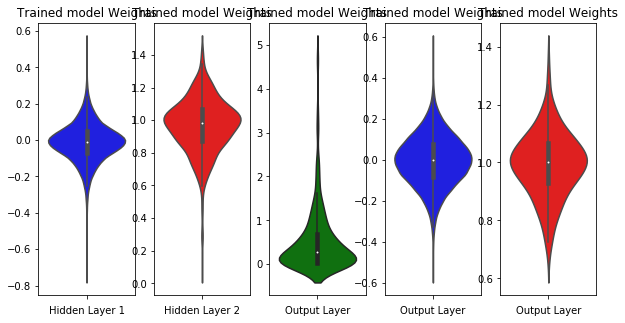

In [215]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [216]:
#finding loss and accuracy on test data
mlp_5_c_2_score = model_5_c_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_2_score[0]) 
print('Test accuracy:', mlp_5_c_2_score[1])

Test score: 0.07592336373938306
Test accuracy: 0.9834


## MLP with 5 hidden layers (512, 256, 128, 64, 16) and BatchNormalization and dropout(0.2)

In [217]:
#defining model architecture
model_5_c_3 = Sequential()

model_5_c_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_c_3.add(BatchNormalization())
model_5_c_3.add(Dropout(0.2))

model_5_c_3.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_3.add(BatchNormalization())
model_5_c_3.add(Dropout(0.2))

model_5_c_3.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_3.add(BatchNormalization())
model_5_c_3.add(Dropout(0.2))

model_5_c_3.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_3.add(BatchNormalization())
model_5_c_3.add(Dropout(0.2))

model_5_c_3.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_3.add(BatchNormalization())
model_5_c_3.add(Dropout(0.2))

model_5_c_3.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c_3.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_112 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_81 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_113 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_82 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_188 (Dense)            (None, 128)             

In [218]:
model_5_c_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 36s 751us/step - loss: 0.6058 - acc: 0.8426 - val_loss: 0.1632 - val_acc: 0.9528
Epoch 2/50
48000/48000 [==============================] - 25s 526us/step - loss: 0.2238 - acc: 0.9457 - val_loss: 0.1336 - val_acc: 0.9624
Epoch 3/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.1649 - acc: 0.9577 - val_loss: 0.1211 - val_acc: 0.9673
Epoch 4/50
48000/48000 [==============================] - 25s 525us/step - loss: 0.1370 - acc: 0.9643 - val_loss: 0.0991 - val_acc: 0.9726
Epoch 5/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.1124 - acc: 0.9704 - val_loss: 0.0907 - val_acc: 0.9754
Epoch 6/50
48000/48000 [==============================] - 25s 528us/step - loss: 0.0978 - acc: 0.9748 - val_loss: 0.1017 - val_acc: 0.9716
Epoch 7/50
48000/48000 [==============================] - 25s 525us/step - loss: 0.0933 - acc: 0.9756 - val_loss: 0.

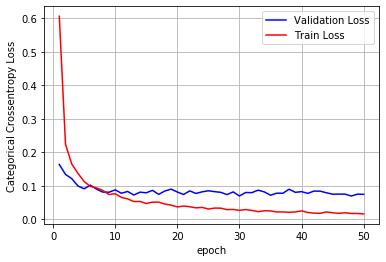

In [219]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

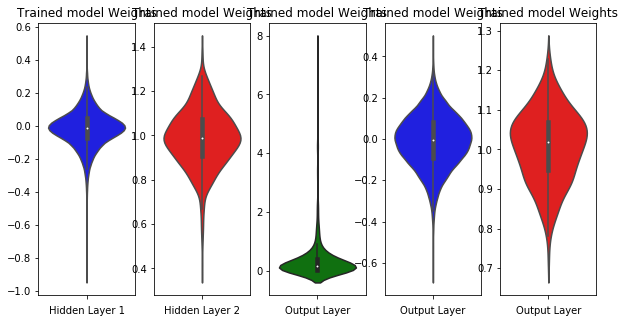

In [220]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [221]:
#finding loss and accuracy on test data
mlp_5_c_3_score = model_5_c_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_3_score[0]) 
print('Test accuracy:', mlp_5_c_3_score[1])

Test score: 0.07757121050542955
Test accuracy: 0.9855


## MLP with 5 hidden layers (512, 256, 128, 64, 16) and BatchNormalization and dropout(0.3)

In [222]:
#defining model architecture
model_5_c_4 = Sequential()

model_5_c_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_c_4.add(BatchNormalization())
model_5_c_4.add(Dropout(0.3))

model_5_c_4.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_4.add(BatchNormalization())
model_5_c_4.add(Dropout(0.3))

model_5_c_4.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_4.add(BatchNormalization())
model_5_c_4.add(Dropout(0.3))

model_5_c_4.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_4.add(BatchNormalization())
model_5_c_4.add(Dropout(0.3))

model_5_c_4.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_4.add(BatchNormalization())
model_5_c_4.add(Dropout(0.3))

model_5_c_4.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c_4.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_117 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_86 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_193 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_118 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_87 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_194 (Dense)            (None, 128)             

In [223]:
model_5_c_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 786us/step - loss: 0.8751 - acc: 0.7565 - val_loss: 0.1839 - val_acc: 0.9503
Epoch 2/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.3073 - acc: 0.9268 - val_loss: 0.1384 - val_acc: 0.9632
Epoch 3/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.2254 - acc: 0.9455 - val_loss: 0.1448 - val_acc: 0.9596
Epoch 4/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.1871 - acc: 0.9546 - val_loss: 0.1310 - val_acc: 0.9662
Epoch 5/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.1605 - acc: 0.9607 - val_loss: 0.1129 - val_acc: 0.9701
Epoch 6/50
48000/48000 [==============================] - 25s 521us/step - loss: 0.1443 - acc: 0.9651 - val_loss: 0.0984 - val_acc: 0.9724
Epoch 7/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.1308 - acc: 0.9684 - val_loss: 0.

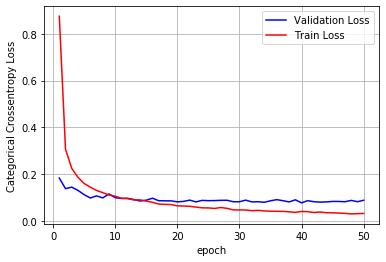

In [224]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

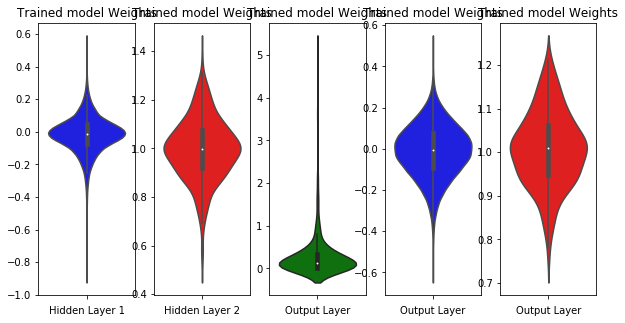

In [225]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [226]:
#finding loss and accuracy on test data
mlp_5_c_4_score = model_5_c_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_4_score[0]) 
print('Test accuracy:', mlp_5_c_4_score[1])

Test score: 0.08028275577120075
Test accuracy: 0.9845


## MLP with 5 hidden layers (512, 256, 128, 64, 16) and BatchNormalization and dropout(0.5)

In [227]:
#defining model architecture
model_5_c_5 = Sequential()

model_5_c_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 256 units
model_5_c_5.add(BatchNormalization())
model_5_c_5.add(Dropout(0.5))

model_5_c_5.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_5.add(BatchNormalization())
model_5_c_5.add(Dropout(0.5))

model_5_c_5.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_5.add(BatchNormalization())
model_5_c_5.add(Dropout(0.5))

model_5_c_5.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_5.add(BatchNormalization())
model_5_c_5.add(Dropout(0.5))

model_5_c_5.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c_5.add(BatchNormalization())
model_5_c_5.add(Dropout(0.5))

model_5_c_5.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c_5.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_122 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_91 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_199 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_123 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_92 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_200 (Dense)            (None, 128)             

In [228]:
model_5_c_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 795us/step - loss: 1.6108 - acc: 0.4605 - val_loss: 0.5385 - val_acc: 0.8712
Epoch 2/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.8187 - acc: 0.7466 - val_loss: 0.2562 - val_acc: 0.9371
Epoch 3/50
48000/48000 [==============================] - 26s 536us/step - loss: 0.5619 - acc: 0.8434 - val_loss: 0.1921 - val_acc: 0.9509
Epoch 4/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.4584 - acc: 0.8795 - val_loss: 0.1684 - val_acc: 0.9590
Epoch 5/50
48000/48000 [==============================] - 26s 536us/step - loss: 0.3888 - acc: 0.9010 - val_loss: 0.1592 - val_acc: 0.9627
Epoch 6/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.3546 - acc: 0.9088 - val_loss: 0.1400 - val_acc: 0.9662
Epoch 7/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.3269 - acc: 0.9185 - val_loss: 0.

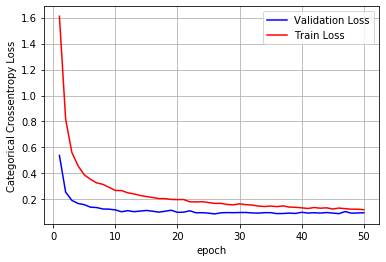

In [229]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

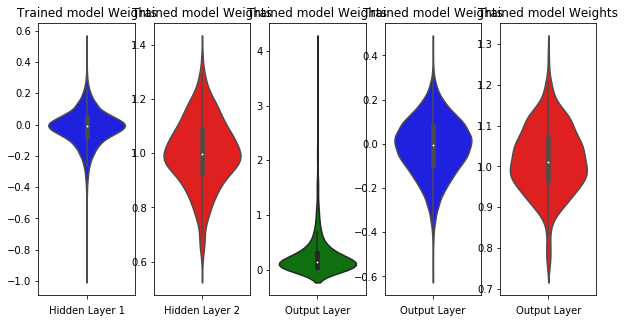

In [230]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [231]:
#finding loss and accuracy on test data
mlp_5_c_5_score = model_5_c_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_5_score[0]) 
print('Test accuracy:', mlp_5_c_5_score[1])

Test score: 0.0971389955242481
Test accuracy: 0.9833


## MLP with 5 hidden layers (512, 256, 128, 64, 32) with he_normal initializer

In [232]:
#defining model architecture
model_5_d_1 = Sequential()

model_5_d_1.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 256 units
model_5_d_1.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_5_d_1.add(Dense(128, activation="relu", kernel_initializer="he_normal")) 
model_5_d_1.add(Dense(64, activation="relu", kernel_initializer="he_normal")) 
model_5_d_1.add(Dense(32, activation="relu", kernel_initializer="he_normal")) 
model_5_d_1.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d_1.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_205 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_206 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_207 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_208 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_209 (Dense)            (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [233]:
model_5_d_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.2810 - acc: 0.9147 - val_loss: 0.1315 - val_acc: 0.9617
Epoch 2/50
48000/48000 [==============================] - 14s 291us/step - loss: 0.0973 - acc: 0.9698 - val_loss: 0.1096 - val_acc: 0.9673
Epoch 3/50
48000/48000 [==============================] - 14s 289us/step - loss: 0.0665 - acc: 0.9795 - val_loss: 0.0969 - val_acc: 0.9707
Epoch 4/50
48000/48000 [==============================] - 14s 287us/step - loss: 0.0472 - acc: 0.9848 - val_loss: 0.0846 - val_acc: 0.9751
Epoch 5/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.0404 - acc: 0.9869 - val_loss: 0.0878 - val_acc: 0.9757
Epoch 6/50
48000/48000 [==============================] - 14s 288us/step - loss: 0.0319 - acc: 0.9897 - val_loss: 0.1079 - val_acc: 0.9723
Epoch 7/50
48000/48000 [==============================] - 14s 290us/step - loss: 0.0254 - acc: 0.9917 - val_loss: 0.

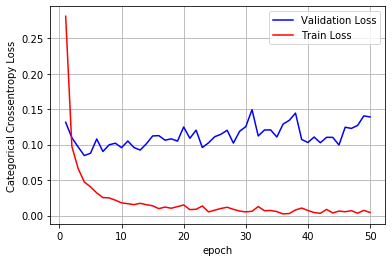

In [234]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

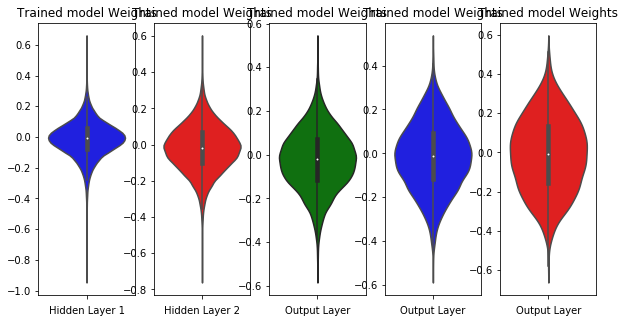

In [235]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d_1.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [236]:
#finding loss and accuracy on test data

mlp_5_d_1_score = model_5_d_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_1_score[0]) 
print('Test accuracy:', mlp_5_d_1_score[1])

Test score: 0.1389419153434293
Test accuracy: 0.9785


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization with he_normal initializer

In [237]:
#defining model architecture
model_5_d_2 = Sequential()

model_5_d_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 256 units
model_5_d_2.add(BatchNormalization())

model_5_d_2.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_5_d_2.add(BatchNormalization())

model_5_d_2.add(Dense(128, activation="relu", kernel_initializer="he_normal")) 
model_5_d_2.add(BatchNormalization())

model_5_d_2.add(Dense(64, activation="relu", kernel_initializer="he_normal")) 
model_5_d_2.add(BatchNormalization())

model_5_d_2.add(Dense(32, activation="relu", kernel_initializer="he_normal")) 
model_5_d_2.add(BatchNormalization())

model_5_d_2.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d_2.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_127 (Bat (None, 512)               2048      
_________________________________________________________________
dense_211 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_128 (Bat (None, 256)               1024      
_________________________________________________________________
dense_212 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_129 (Bat (None, 128)               512       
_________________________________________________________________
dense_213 (Dense)            (None, 64)              

In [238]:
model_5_d_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 37s 775us/step - loss: 0.2836 - acc: 0.9216 - val_loss: 0.1388 - val_acc: 0.9604
Epoch 2/50
48000/48000 [==============================] - 25s 514us/step - loss: 0.0966 - acc: 0.9713 - val_loss: 0.1035 - val_acc: 0.9686
Epoch 3/50
48000/48000 [==============================] - 25s 515us/step - loss: 0.0657 - acc: 0.9802 - val_loss: 0.1023 - val_acc: 0.9693
Epoch 4/50
48000/48000 [==============================] - 25s 519us/step - loss: 0.0545 - acc: 0.9831 - val_loss: 0.0885 - val_acc: 0.9737
Epoch 5/50
48000/48000 [==============================] - 25s 517us/step - loss: 0.0432 - acc: 0.9862 - val_loss: 0.0916 - val_acc: 0.9728
Epoch 6/50
48000/48000 [==============================] - 25s 515us/step - loss: 0.0394 - acc: 0.9870 - val_loss: 0.0923 - val_acc: 0.9739: 0s - loss: 0.0394 - acc: 0.
Epoch 7/50
48000/48000 [==============================] - 25s 513us/step - loss: 0.0281

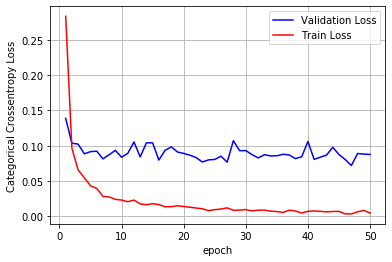

In [239]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

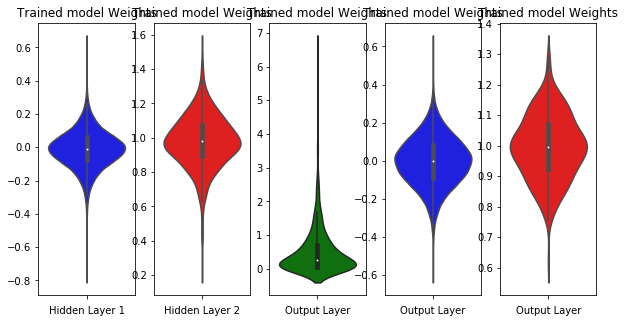

In [240]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [241]:
#finding loss and accuracy on test data
mlp_5_d_2_score = model_5_d_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_2_score[0]) 
print('Test accuracy:', mlp_5_d_2_score[1])

Test score: 0.09174855163776374
Test accuracy: 0.9806


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.2) with he_normal initializer

In [242]:
#defining model architecture
model_5_d_3 = Sequential()

model_5_d_3.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 256 units
model_5_d_3.add(BatchNormalization())
model_5_d_3.add(Dropout(0.2))

model_5_d_3.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_5_d_3.add(BatchNormalization())
model_5_d_3.add(Dropout(0.2))

model_5_d_3.add(Dense(128, activation="relu", kernel_initializer="he_normal")) 
model_5_d_3.add(BatchNormalization())
model_5_d_3.add(Dropout(0.2))

model_5_d_3.add(Dense(64, activation="relu", kernel_initializer="he_normal")) 
model_5_d_3.add(BatchNormalization())
model_5_d_3.add(Dropout(0.2))

model_5_d_3.add(Dense(32, activation="relu", kernel_initializer="he_normal")) 
model_5_d_3.add(BatchNormalization())
model_5_d_3.add(Dropout(0.2))

model_5_d_3.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d_3.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_132 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_96 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_133 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_97 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 128)             

In [243]:
model_5_d_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 40s 833us/step - loss: 0.5591 - acc: 0.8410 - val_loss: 0.1599 - val_acc: 0.9540
Epoch 2/50
48000/48000 [==============================] - 28s 577us/step - loss: 0.2057 - acc: 0.9448 - val_loss: 0.1138 - val_acc: 0.9657
Epoch 3/50
48000/48000 [==============================] - 28s 578us/step - loss: 0.1507 - acc: 0.9590 - val_loss: 0.1087 - val_acc: 0.9686
Epoch 4/50
48000/48000 [==============================] - 28s 576us/step - loss: 0.1262 - acc: 0.9650 - val_loss: 0.0956 - val_acc: 0.9715
Epoch 5/50
48000/48000 [==============================] - 28s 574us/step - loss: 0.1113 - acc: 0.9694 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 6/50
48000/48000 [==============================] - 28s 575us/step - loss: 0.0934 - acc: 0.9729 - val_loss: 0.0965 - val_acc: 0.9731
Epoch 7/50
48000/48000 [==============================] - 28s 573us/step - loss: 0.0845 - acc: 0.9765 - val_loss: 0.

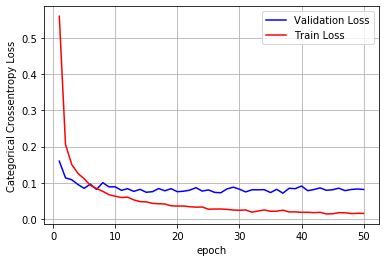

In [244]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

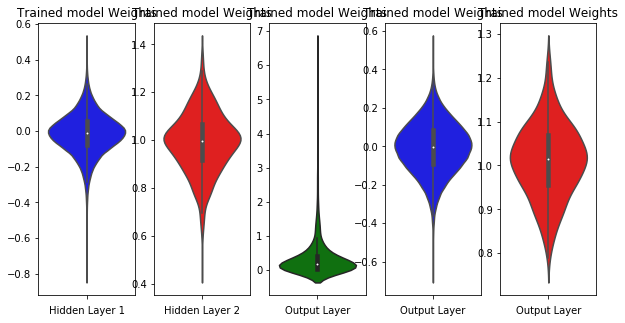

In [245]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [246]:
#finding loss and accuracy on test data
mlp_5_d_3_score = model_5_d_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_3_score[0]) 
print('Test accuracy:', mlp_5_d_3_score[1])

Test score: 0.08042247839685587
Test accuracy: 0.9825


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.3) with he_normal initializer

In [247]:
#defining model architecture
model_5_d_4 = Sequential()

model_5_d_4.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 256 units
model_5_d_4.add(BatchNormalization())
model_5_d_4.add(Dropout(0.3))

model_5_d_4.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_5_d_4.add(BatchNormalization())
model_5_d_4.add(Dropout(0.3))

model_5_d_4.add(Dense(128, activation="relu", kernel_initializer="he_normal")) 
model_5_d_4.add(BatchNormalization())
model_5_d_4.add(Dropout(0.3))

model_5_d_4.add(Dense(64, activation="relu", kernel_initializer="he_normal")) 
model_5_d_4.add(BatchNormalization())
model_5_d_4.add(Dropout(0.3))

model_5_d_4.add(Dense(32, activation="relu", kernel_initializer="he_normal")) 
model_5_d_4.add(BatchNormalization())
model_5_d_4.add(Dropout(0.3))

model_5_d_4.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d_4.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_137 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_101 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_223 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_138 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_102 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_224 (Dense)            (None, 128)             

In [248]:
model_5_d_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 42s 867us/step - loss: 0.7745 - acc: 0.7699 - val_loss: 0.1926 - val_acc: 0.9453
Epoch 2/50
48000/48000 [==============================] - 28s 583us/step - loss: 0.2834 - acc: 0.9258 - val_loss: 0.1479 - val_acc: 0.9586
Epoch 3/50
48000/48000 [==============================] - 28s 583us/step - loss: 0.2117 - acc: 0.9442 - val_loss: 0.1144 - val_acc: 0.9678
Epoch 4/50
48000/48000 [==============================] - 28s 589us/step - loss: 0.1770 - acc: 0.9526 - val_loss: 0.1050 - val_acc: 0.9698
Epoch 5/50
48000/48000 [==============================] - 29s 614us/step - loss: 0.1497 - acc: 0.9608 - val_loss: 0.0963 - val_acc: 0.9729
Epoch 6/50
48000/48000 [==============================] - 29s 596us/step - loss: 0.1308 - acc: 0.9653 - val_loss: 0.1047 - val_acc: 0.9722
Epoch 7/50
48000/48000 [==============================] - 28s 582us/step - loss: 0.1239 - acc: 0.9668 - val_loss: 0.

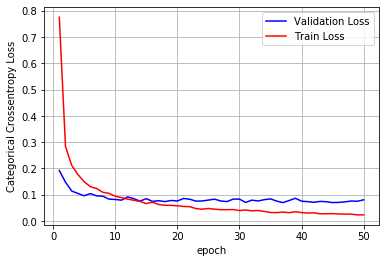

In [249]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

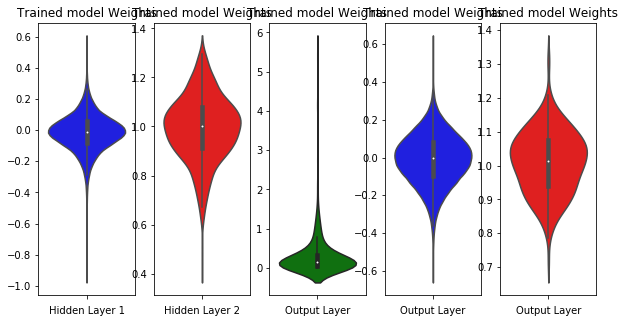

In [250]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d_4.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [251]:
#finding loss and accuracy on test data
mlp_5_d_4_score = model_5_d_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_4_score[0]) 
print('Test accuracy:', mlp_5_d_4_score[1])

Test score: 0.0755359749306197
Test accuracy: 0.9842


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization and dropout(0.5) with he_normal initializer

In [252]:
#defining model architecture
model_5_d_5 = Sequential()

model_5_d_5.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="he_normal")) #first hidden layer with 256 units
model_5_d_5.add(BatchNormalization())
model_5_d_5.add(Dropout(0.5))

model_5_d_5.add(Dense(256, activation="relu", kernel_initializer="he_normal")) 
model_5_d_5.add(BatchNormalization())
model_5_d_5.add(Dropout(0.5))

model_5_d_5.add(Dense(128, activation="relu", kernel_initializer="he_normal")) 
model_5_d_5.add(BatchNormalization())
model_5_d_5.add(Dropout(0.5))

model_5_d_5.add(Dense(64, activation="relu", kernel_initializer="he_normal")) 
model_5_d_5.add(BatchNormalization())
model_5_d_5.add(Dropout(0.5))

model_5_d_5.add(Dense(32, activation="relu", kernel_initializer="he_normal")) 
model_5_d_5.add(BatchNormalization())
model_5_d_5.add(Dropout(0.5))

model_5_d_5.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d_5.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_142 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_106 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_229 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_143 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_107 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_230 (Dense)            (None, 128)             

In [253]:
model_5_d_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 43s 902us/step - loss: 1.5932 - acc: 0.4759 - val_loss: 0.4394 - val_acc: 0.8892
Epoch 2/50
48000/48000 [==============================] - 29s 607us/step - loss: 0.7150 - acc: 0.7868 - val_loss: 0.2466 - val_acc: 0.9320
Epoch 3/50
48000/48000 [==============================] - 29s 603us/step - loss: 0.4947 - acc: 0.8670 - val_loss: 0.2017 - val_acc: 0.9468
Epoch 4/50
48000/48000 [==============================] - 29s 604us/step - loss: 0.3781 - acc: 0.9044 - val_loss: 0.1674 - val_acc: 0.9570
Epoch 5/50
48000/48000 [==============================] - 29s 602us/step - loss: 0.3263 - acc: 0.9207 - val_loss: 0.1551 - val_acc: 0.9604
Epoch 6/50
48000/48000 [==============================] - 29s 608us/step - loss: 0.2938 - acc: 0.9305 - val_loss: 0.1434 - val_acc: 0.9631
Epoch 7/50
48000/48000 [==============================] - 29s 601us/step - loss: 0.2664 - acc: 0.9376 - val_loss: 0.

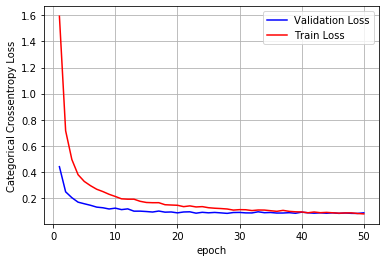

In [254]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

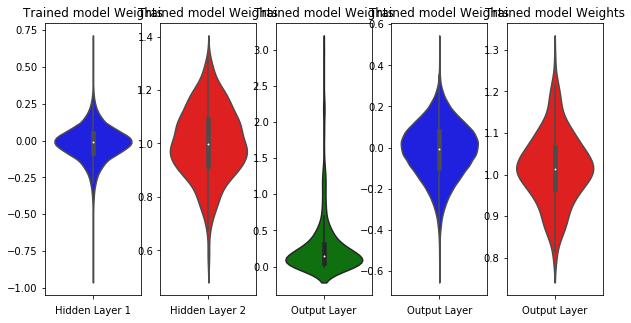

In [255]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d_5.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")

ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [256]:
#finding loss and accuracy on test data
mlp_5_d_5_score = model_5_d_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_5_score[0]) 
print('Test accuracy:', mlp_5_d_5_score[1])

Test score: 0.07885641690881748
Test accuracy: 0.9829


In [258]:

table = PrettyTable();
table.field_names = ['# Units','BN', 'Dropout Rate', 'Initializer', 'score', 'Accuracy'];
table.add_row(['(1024, 512, 256, 128, 64)', 'No', 'None', 'glorot_normal', mlp_5_a_1_score[0], mlp_5_a_1_score[1]])
table.add_row(['(1024, 512, 256, 128, 64)', 'Yes', 'None', 'glorot_normal', mlp_5_a_2_score[0],mlp_5_a_2_score[1]])
table.add_row(['(1024, 512, 256, 128, 64)', 'Yes', '0.2', 'glorot_normal', mlp_5_a_5_score[0], mlp_5_a_5_score[1]])
table.add_row(['(1024, 512, 256, 128, 64)', 'Yes', '0.3', 'glorot_normal', mlp_5_a_4_score[0], mlp_5_a_4_score[1]])
table.add_row(['(1024, 512, 256, 128, 64)', 'Yes', '0.5', 'glorot_normal', mlp_5_a_5_score[0], mlp_5_a_5_score[1]])

table.add_row(['(512, 256, 128, 64, 32)', 'No', 'None', 'glorot_normal', mlp_5_b_1_score[0], mlp_5_b_1_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', 'None', 'glorot_normal', mlp_5_b_2_score[0],mlp_5_b_2_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.2', 'glorot_normal', mlp_5_b_5_score[0],mlp_5_b_5_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.3', 'glorot_normal', mlp_5_b_4_score[0],mlp_5_b_4_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.5', 'glorot_normal', mlp_5_b_5_score[0],mlp_5_b_5_score[1]])

table.add_row(['(512, 256, 128, 64, 16)', 'No', 'None', 'glorot_normal', mlp_5_c_1_score[0], mlp_5_c_1_score[1]])
table.add_row(['(512, 256, 128, 64, 16)', 'Yes', 'None', 'glorot_normal', mlp_5_c_2_score[0],mlp_5_c_2_score[1]])
table.add_row(['(512, 256, 128, 64, 16)', 'Yes', '0.2', 'glorot_normal', mlp_5_c_5_score[0],mlp_5_c_5_score[1]])
table.add_row(['(512, 256, 128, 64, 16)', 'Yes', '0.3', 'glorot_normal', mlp_5_c_4_score[0],mlp_5_c_4_score[1]])
table.add_row(['(512, 256, 128, 64, 16)', 'Yes', '0.5', 'glorot_normal', mlp_5_c_5_score[0],mlp_5_c_5_score[1]])

table.add_row(['(512, 256, 128, 64, 32)', 'No', 'None', 'he_normal', mlp_5_d_1_score[0], mlp_5_d_1_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', 'None', 'he_normal', mlp_5_d_2_score[0],mlp_5_d_2_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.2', 'he_normal', mlp_5_d_5_score[0],mlp_5_d_5_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.3', 'he_normal', mlp_5_d_4_score[0],mlp_5_d_4_score[1]])
table.add_row(['(512, 256, 128, 64, 32)', 'Yes', '0.5', 'he_normal', mlp_5_d_5_score[0],mlp_5_d_5_score[1]])


print(table)

+---------------------------+-----+--------------+---------------+---------------------+----------+
|          # Units          |  BN | Dropout Rate |  Initializer  |        score        | Accuracy |
+---------------------------+-----+--------------+---------------+---------------------+----------+
| (1024, 512, 256, 128, 64) |  No |     None     | glorot_normal | 0.11351816535617955 |  0.9849  |
| (1024, 512, 256, 128, 64) | Yes |     None     | glorot_normal |  0.0802678033330405 |  0.9825  |
| (1024, 512, 256, 128, 64) | Yes |     0.2      | glorot_normal | 0.06747064908958855 |  0.9849  |
| (1024, 512, 256, 128, 64) | Yes |     0.3      | glorot_normal | 0.06816437180633657 |  0.9843  |
| (1024, 512, 256, 128, 64) | Yes |     0.5      | glorot_normal | 0.06747064908958855 |  0.9849  |
|  (512, 256, 128, 64, 32)  |  No |     None     | glorot_normal | 0.10854551430993133 |  0.9801  |
|  (512, 256, 128, 64, 32)  | Yes |     None     | glorot_normal | 0.10454819987511874 |  0.9796  |


# Conclusions:
- I have tried different architectures containing 2, 3 and 5 hidden layers and trained using 50 epoch for each architecture.
- Each architecture is unique in terms of no. of neurons, BatchNormalization, Dropout, kernel initializer.
- It's observed that without BatchNormalization and Dropout, the network is overfitting as there is huge gap between train loss and validation loss, and both are not appear to coming close to each other, as on one side train loss is decreasing but validation loss is oscillating in fixed loss ranged.
- For 2 hidden layer architecture it's found 
    - that its giving better results with he_normal initializer as compare to glorot_normal.
    - architecture with 512, 256 neurons in their hidden layers, with BatchNormalization, and dropout of 0.3 giving the best accuracy.
- For 3 hidden layers architecture it's found 
    - that its giving better results as compare 2 hidden layers architectures.
    - architecture with 1024, 512, 256 neurons in their hidden layers, with BatchNormalization, and dropout of 0.3 giving the best accuracy.
- For 5 hidden layers architecture it's found 
    - that it's results are somewhat between 2 and 3 hidden layers architecture.
    - architecture with 1024, 512, 256, 128, 64 neurons in their hidden layers, with BatchNormalization, and dropout of  0.5 giving the best accuracy.
